(<a href='#Table of Contents'>Top</a>)<a id='load_env'></a><h3>Update Environment</h3>

Python packages specific to the example notebooks may be needed to install. Use `conda`.

**Packages installed with conda**: [conda_requirements.yml](https://raw.githubusercontent.com/Fahima-Islam/c3dp/documentation/notebooks/conda_requirements.yml)  
`conda env update -f conda_requirements.yml`



In [1]:
import sys, os
import numpy as np
import c3dp

In [2]:
parent_dir = os.path.abspath(os.pardir)

# converting neutron events saved In McStas to McVine

In [4]:
from c3dp.instruments.guide.COnversion_MCSTAStoMCVINE_file import mcstas2mcvine

mcstas_file_name = 'neutrons_before_sample_oldG.dat'
mcvine_file_name= 'Neutrons_mcvine.dat'
Mcstas_file_path=os.path.join(parent_dir, 'McStas_file/{mcstas_file_name}'.format(mcstas_file_name=mcstas_file_name))
McVine_file_path=os.path.join(parent_dir, 'beam/{mcvine_file_name}'.format(mcvine_file_name=mcvine_file_name))

mcstas2mcvine(Mcstas_file_path, McVine_file_path)

### verified the neutron events saved in macvine file####

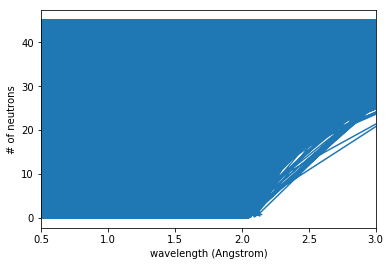

In [5]:
from c3dp.reduction.neutrons2lambda import process , convert2histogram
lam, d, p = process(McVine_file_path)

from matplotlib import pyplot as plt
plt.figure()
plt.plot (lam, p)
plt.xlabel('wavelength (Angstrom)')
plt.ylabel('# of neutrons')
plt.xlim(0.5,3)
plt.show()

### verified by creating the histogram ###

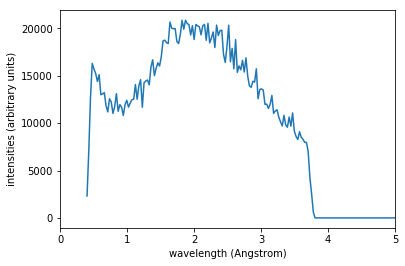

In [6]:
lambda_bin, I_lambda, error = convert2histogram (lam, p, 1000)

plt.figure()
plt.plot (lambda_bin, I_lambda)
plt.xlabel('wavelength (Angstrom)')
plt.ylabel('intensities (arbitrary units)')
plt.xlim(0,5)
plt.show()

# Three files are needed to make the sampleassembly file:
    Geometry file (.xml file), 
    unit cell information (.cif file) and 
    scattering kernels file (name-scatterer.xml file) which defines the scattering formula or diffraction peaks

### creating sample geometry ###################

In [7]:
from c3dp.instruments.cellgeometry.clampcell_geo import Clampcell
sample_height=28.57
sample_dia=4.16
clampCell= Clampcell(sample_height=sample_height)
sample= clampCell.sample(sample_dia=sample_dia)
sample_geo_directory = os.path.join(parent_dir, 'sample')
sample_geo_filename = 'sample_geo'
clampCell.creating_geometry_xml(sample,sample_geo_filename, sample_geo_directory, False)

In [8]:
sample_geo_file_directory = os.path.join (sample_geo_directory, sample_geo_filename)

### creating sample diffraction peaks ####

In [9]:
import c3dp.instruments.scatkernel.Diffraction_peaks as diff
sample_Formula= 'Si'
cif_file_name= '{}.cif'.format(sample_Formula) 
input_cifFile_path = os.path.join(parent_dir, 'CIF_file/{cif_file_name}'.format(cif_file_name=cif_file_name))
number_peaks = 1
first_peak_index = 3
filePath_toSave_temperature = os.path.join(parent_dir, 'c3dp/instruments/scatkernel/bem')
filePath_tosave_DiffractionPeakResult= os.path.join(parent_dir, 'sample/{}'.format(sample_Formula))
significant_coponent= sample_Formula
diff.diffraction(input_cifFile_path,filePath_toSave_temperature, filePath_tosave_DiffractionPeakResult, significant_coponent, 
                 first_peak_index=first_peak_index, number_of_peaks=number_peaks ,Temperatrure=300)

/home/fi0/c3dp_JOB/second_repo/c3dp/c3dp/instruments/scatkernel/braggedgemodeling/bem/__init__.py:19: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(open(conf_path))


### creating sample scattering kernel file ##################

In [10]:
import c3dp.instruments.scatkernel.scattering_kernal_program as skp
diffraction_peak_path= filePath_tosave_DiffractionPeakResult
scaterer_type_name = 'sample'
kernel_type = 'elastic'
path_toSave_scaterinfKernel_file = os.path.join(parent_dir, 'sample')
skp.makeSKXML(kernel_type,path_toSave_scaterinfKernel_file, scaterer_type_name, diffraction_peak_path )

### creating cell (outer_body) geometry #############

In [11]:
# from c3dp.instruments.cellgeometry.clampcell_geo import Clampcell
sample_height=28.57
outer_dia=32.05
clampCell= Clampcell(sample_height=sample_height)
cell_outerBody= clampCell.outer_body(outer_dia=32.05)
cell_outerBody_geo_directory = os.path.join(parent_dir, 'sample')
cell_outerBody_geo_filename = 'cell_outerBody_geo'
clampCell.creating_geometry_xml(cell_outerBody,cell_outerBody_geo_filename, cell_outerBody_geo_directory, False)

In [12]:
outerBody_geo_file_directory = os.path.join (cell_outerBody_geo_directory, cell_outerBody_geo_filename)

### creating cell (outer_body) diffraction peaks ##########

In [13]:
# import c3dp.instruments.scatkernel.Diffraction_peaks as diff
outerBody_Formula= 'Al'
cif_file_name= '{}.cif'.format(outerBody_Formula) 
input_cifFile_path_cell = os.path.join(parent_dir, 'CIF_file/{cif_file_name}'.format(cif_file_name=cif_file_name))
first_peak_index = 5
filePath_toSave_temperature = os.path.join(parent_dir, 'c3dp/instruments/scatkernel/bem')
filePath_tosave_DiffractionPeakResult= os.path.join(parent_dir, 'sample/{}'.format(outerBody_Formula))
significant_coponent= outerBody_Formula
diff.diffraction(input_cifFile_path_cell,filePath_toSave_temperature, filePath_tosave_DiffractionPeakResult, significant_coponent,
                 first_peak_index=first_peak_index, number_of_peaks=number_peaks ,Temperatrure=300)

### creating cell (outer_body) scattering kernel file #########

In [14]:
# import c3dp.instruments.scatkernel.scattering_kernal_program as skp
diffraction_peak_path= filePath_tosave_DiffractionPeakResult
scaterer_type_name_outerBody = 'outer_body'
kernel_type = 'elastic'
path_toSave_scaterinfKernel_file = os.path.join(parent_dir, 'sample')
skp.makeSKXML(kernel_type,path_toSave_scaterinfKernel_file, scaterer_type_name_outerBody, diffraction_peak_path )

### creating cell (iiner_sleeve) geometry ###################

In [15]:
# from c3dp.instruments.cellgeometry.clampcell_geo import Clampcell
sample_height=28.57
inner_dia=4.7
clampCell= Clampcell(sample_height=sample_height)
cell_innerSleeve= clampCell.inner_sleeve(inner_dia=4.7)
cell_inner_sleeve_geo_directory = os.path.join(parent_dir, 'sample')
cell_inner_sleeve_geo_filename = 'cell_inner_sleeve_geo'
clampCell.creating_geometry_xml(cell_innerSleeve,cell_inner_sleeve_geo_filename, cell_inner_sleeve_geo_directory, False)

In [16]:
inner_sleeve_geo_file_directory = os.path.join (cell_inner_sleeve_geo_directory, cell_inner_sleeve_geo_filename)

### creating cell (inner_sleeve) diffraction peaks #################

In [17]:
# import c3dp.instruments.scatkernel.Diffraction_peaks as diff
inner_sleeve_Formula= 'Cu'
cif_file_name= '{}.cif'.format(inner_sleeve_Formula) 
input_cifFile_path_inner_sleeve = os.path.join(parent_dir, 'CIF_file/{cif_file_name}'.format(cif_file_name=cif_file_name))
first_peak_index = 0
filePath_toSave_temperature = os.path.join(parent_dir, 'c3dp/instruments/scatkernel/bem')
filePath_tosave_DiffractionPeakResult= os.path.join(parent_dir, 'sample/{}'.format(inner_sleeve_Formula))
significant_coponent= inner_sleeve_Formula
diff.diffraction(input_cifFile_path_inner_sleeve,filePath_toSave_temperature, filePath_tosave_DiffractionPeakResult, significant_coponent, 
                 first_peak_index = first_peak_index, number_of_peaks=number_peaks ,Temperatrure=300)

### creating cell (inner_sleeve) scattering kernel file ##################

In [18]:
# import instruments.scatkernel.scattering_kernal_program as skp
diffraction_peak_path= filePath_tosave_DiffractionPeakResult
scaterer_type_name_inner_sleeve = 'inner_sleeve'
kernel_type = 'elastic'
path_toSave_scaterinfKernel_file = os.path.join(parent_dir, 'sample')
skp.makeSKXML(kernel_type,path_toSave_scaterinfKernel_file, scaterer_type_name_inner_sleeve, diffraction_peak_path )

### creating the assembly ##################

In [20]:
from instruments.sampleassembly_program import makeSAXML
sample_assembly_fileName = 'sample'
shape_name_sample = 'shapeSample'
shape_name_outerBody = 'shapeOuterBody'
shape_name_innerSleeve = 'shapeInnerSleeve'
structure_file_type ='cif'

scatterer = {
            (scaterer_type_name_outerBody, shape_name_outerBody , outerBody_geo_file_directory, outerBody_Formula ,input_cifFile_path_cell, structure_file_type),
            (scaterer_type_name_inner_sleeve,shape_name_innerSleeve , inner_sleeve_geo_file_directory, inner_sleeve_Formula ,input_cifFile_path_inner_sleeve, structure_file_type),
            (scaterer_type_name, shape_name_sample , sample_geo_file_directory, sample_Formula ,input_cifFile_path, structure_file_type),
            
            }

makeSAXML(sample_assembly_fileName, path_toSave_scaterinfKernel_file, scatterer)

# Run the neutron scattering simulation by sample assembly

### defining parameters to run simulation####

In [21]:
import optimization.optimization_collimator as opt
cell=opt.Collimators()
cell.parameters(ncount=1e6,source_file=mcvine_file_name, 
                sampleassembly_fileName=sample_assembly_fileName, sourceTosample_z=0.02)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._kernel import *
/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mantid/kernel/__init__.py:17: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
  from ._kernel import *


### running simulation to calculate scattered neutrons by sample assembly  #####

1e-05
1
0
0
47.2435936359
0
15.12
0
0
1e-05
1
0
0
66.4178238844
0
0.924
0

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd842f838> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)



0
1e-05
1
0
0
160.149892567
0
1.368
0
0
('detector_angle: ', -50)
(768, 768)


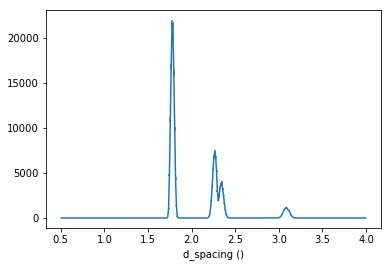

CPU times: user 4min 6s, sys: 1min 7s, total: 5min 13s
Wall time: 3min 43s


In [23]:
%%time
diffraction_pattern_clampCell = cell.diffraction_pattern_calculation ()

# COLLIMATOR SIMULATIOn ##

### COLLLIMATOR mATERIAL scattering kernel #################

In [25]:
# import instruments.scatkernel.scattering_kernal_program as skp
kernel_type = 'inelastic'
scaterer_type_name = 'plastic_collimator'
S_Q_E = "exp(-2.07*Q*Q/30.)"
Q_min = "0./angstrom"
Q_max = "15./angstrom"
Energy_transfer = '-2.07*Q*Q'
path_toSave_scateringKernel_file = os.path.join(parent_dir, 'sample')

skp.makeSKXML(kernel_type,path_toSave_scateringKernel_file, scaterer_type_name,
              E=Energy_transfer, S_Q_E=S_Q_E, Qmin=Q_min, Qmax=Q_max) # it can not be E, it has to be E_Q

### creating the sample assembly for collimator #################

In [28]:
path_tosave_collimator_geometry = os.path.join(parent_dir, 'sample')
collimator_geo_file_Name = 'plastic_collimator'
collimator_geo_file = os.path.join (path_tosave_collimator_geometry, collimator_geo_file_Name)

# from instruments.sampleassembly_program import makeSAXML
sample_assembly_fileName = 'collimator'
shape_name = 'shapeCollimator'
structure_file_type ='xyz'
sample_Formula = 'H'
input_xyz_file_path = os.path.join(parent_dir, 'sample/H.xyz')
path_toSave_scateringnel_file = os.path.join(parent_dir, 'sample')
scatterer = {
            (scaterer_type_name,shape_name , collimator_geo_file, sample_Formula ,input_xyz_file_path, structure_file_type)
             
            }

makeSAXML(sample_assembly_fileName, path_toSave_scateringKernel_file, scatterer)

# OPTIMIZING COLLIMATOR GEOMETRIES FOR MINIMUM CELL TO SIGNAL PEAK RATIO

### defining parameters to run optimization####

In [29]:
import optimization.optimization_collimator as opt
coll=opt.Collimators()
coll.parameters(Snap_angle = True, coll_sim = True  ,
                   source_file = 'sample.mcvine',
                    beam_path='/home/fi0/c3dp_JOB/second_repo/c3dp/out/sample/rank0-step0',
                    template =None,
                    SNAP_definition_file =None,
                    nodes=20,
                    sampleassembly_fileName = sample_assembly_fileName,
                    path_tosave_collimator_geometry = collimator_geo_file,
                    collimator_detector_width = 160,
                    collimator_detector_height = 65.,
                    min_channel_wall_thickness = 1,
                    min_channel_size = 3.,
                    multiple_collimator = False,
                    collimator_Nosupport = True,
                    scad_flag = False,
                    ncount=1e6, sourceTosample_x = 0.0,
                    sourceTosample_y = 0.0, sourceTosample_z = 0.0, moderatorTosample_z=-14,
                    angleMons = [-50, 105] ,
                    collimator_angles=[-45],
                    sampleTodetector_z=[0.5, 0.5], detector_width=[0.5,0.5], detector_height=[0.5, 0.5],
                    number_pixels_in_height=[256, 256],
                    number_pixels_in_width=[256, 256], number_of_box_in_height=[3,3],
                    number_of_box_in_width=[3,3], masking = False,
                    masked_template = 'coll_plastic_SCAT_masked.nxs',
                    binning=[0.5, 0.01, 4.],number_of_detectors= 1,
                    )

### running simulation to optimize collimator geometry 

('coll height at detector side: ', 30.695796281496094)
('coll width at detector side: ', 30.695796281496094)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd82f0368> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


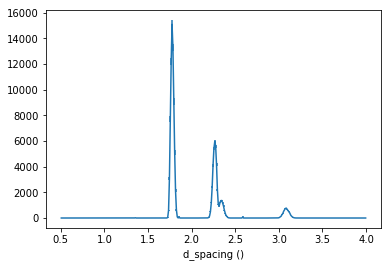

('coll_len,:', 7.168154834171004, 'focal_distance,:', 29.666800703624308, 'collimator_performance: ', 0.0874349471362307)
('coll height at detector side: ', 25.197055386492174)
('coll width at detector side: ', 25.197055386492174)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8201730> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


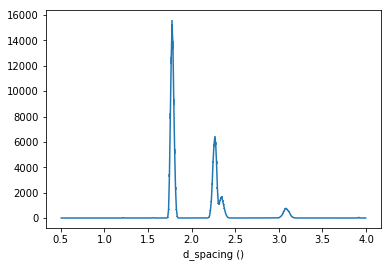

('coll_len,:', 3.842656930907679, 'focal_distance,:', 26.39380953288293, 'collimator_performance: ', 0.08136519298521117)
('coll height at detector side: ', 31.501702386659662)
('coll width at detector side: ', 31.501702386659662)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87a2520> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


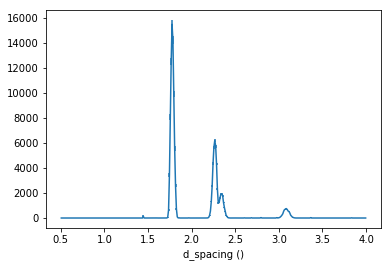

('coll_len,:', 2.059659677981469, 'focal_distance,:', 35.74238318601012, 'collimator_performance: ', 0.07877720288986216)
('coll height at detector side: ', 42.66698371464886)
('coll width at detector side: ', 42.66698371464886)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc86ec260> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


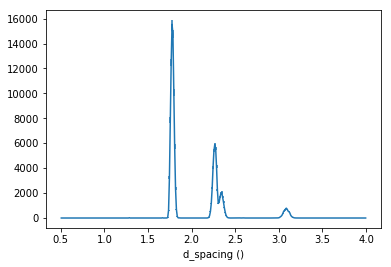

('coll_len,:', 3.2544184783753254, 'focal_distance,:', 47.9459619792033, 'collimator_performance: ', 0.07952693211731902)
('coll height at detector side: ', 39.83377050548374)
('coll width at detector side: ', 39.83377050548374)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc862fa48> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


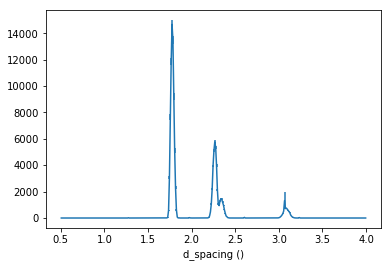

('coll_len,:', 7.67052541988422, 'focal_distance,:', 40.12999918669627, 'collimator_performance: ', 0.09742145815558541)
('coll height at detector side: ', 20.915886824005426)
('coll width at detector side: ', 20.915886824005426)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc85674c8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


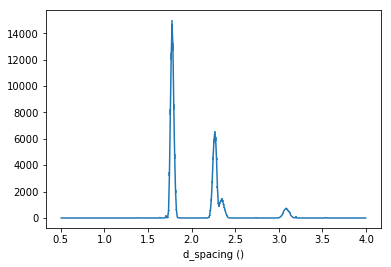

('coll_len,:', 4.651932372927608, 'focal_distance,:', 20.4471318158789, 'collimator_performance: ', 0.0831099571548154)
('coll height at detector side: ', 25.226386008435867)
('coll width at detector side: ', 25.226386008435867)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc849f3c0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


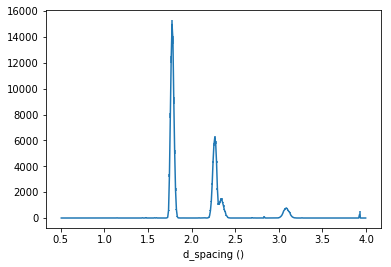

('coll_len,:', 6.10740818790022, 'focal_distance,:', 24.164255022222818, 'collimator_performance: ', 0.0859111286623544)
('coll height at detector side: ', 41.194528133660235)
('coll width at detector side: ', 41.194528133660235)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83e78e8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


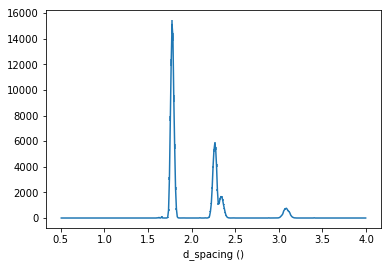

('coll_len,:', 5.3602768953269635, 'focal_distance,:', 44.073156865065314, 'collimator_performance: ', 0.08405990752434443)
('coll height at detector side: ', 39.48354646187882)
('coll width at detector side: ', 39.48354646187882)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc862fd08> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


(768, 768)


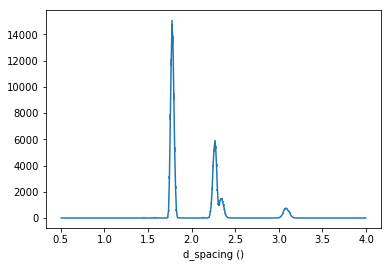

('coll_len,:', 7.250256567558313, 'focal_distance,:', 40.12999918669627, 'collimator_performance: ', 0.08645704200620068)
('coll height at detector side: ', 27.387156923593405)
('coll width at detector side: ', 27.387156923593405)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc862f260> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


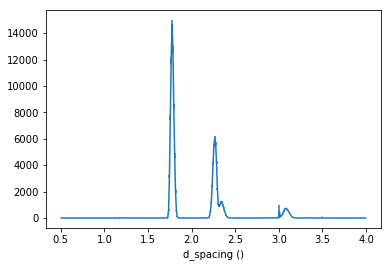

('coll_len,:', 6.470778775429156, 'focal_distance,:', 26.39380953288293, 'collimator_performance: ', 0.09391334830361246)
('coll height at detector side: ', 27.46259160524271)
('coll width at detector side: ', 27.46259160524271)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d22b50> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


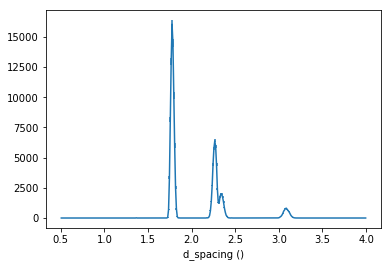

('coll_len,:', 3.1641015134612056, 'focal_distance,:', 29.791008412830042, 'collimator_performance: ', 0.08079834235825616)
('coll height at detector side: ', 43.125706045026526)
('coll width at detector side: ', 43.125706045026526)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84d3a48> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


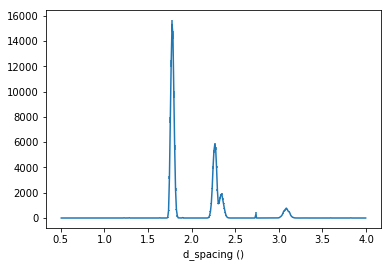

('coll_len,:', 4.203914564710709, 'focal_distance,:', 47.546932689321125, 'collimator_performance: ', 0.08117708249226718)
('coll height at detector side: ', 39.87294486496164)
('coll width at detector side: ', 39.87294486496164)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83a41b0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


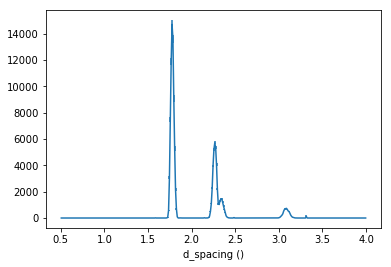

('coll_len,:', 5.953318415022182, 'focal_distance,:', 41.89421542293178, 'collimator_performance: ', 0.08612359247715543)
('coll height at detector side: ', 23.1162907551805)
('coll width at detector side: ', 23.1162907551805)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8343050> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


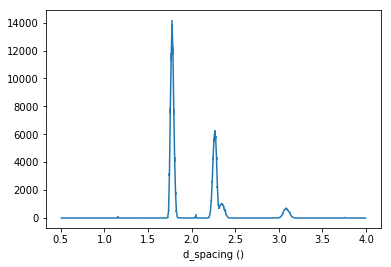

('coll_len,:', 7.2924170903376995, 'focal_distance,:', 20.4471318158789, 'collimator_performance: ', 0.08525231421267157)
('coll height at detector side: ', 34.056845571268354)
('coll width at detector side: ', 34.056845571268354)
('vertical number of channels: ', 6.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc845c838> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


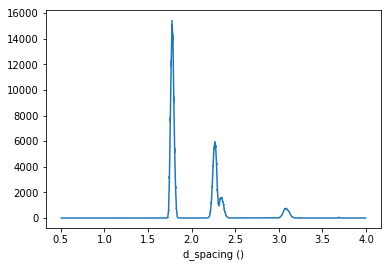

('coll_len,:', 6.10740818790022, 'focal_distance,:', 34.76080649762181, 'collimator_performance: ', 0.08530663735236094)
('coll height at detector side: ', 33.68862924089147)
('coll width at detector side: ', 33.68862924089147)
('vertical number of channels: ', 6.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87cb9f0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


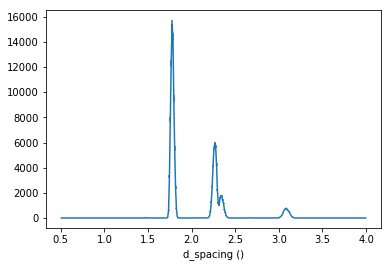

('coll_len,:', 5.1487709019860235, 'focal_distance,:', 35.27758418708374, 'collimator_performance: ', 0.08349960018839889)
('coll height at detector side: ', 19.65664731719483)
('coll width at detector side: ', 19.65664731719483)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8706368> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


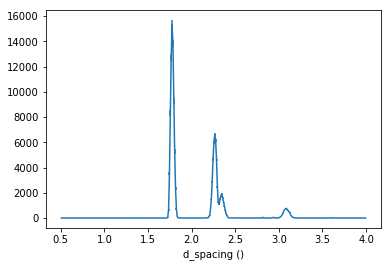

('coll_len,:', 2.852928472572593, 'focal_distance,:', 20.735048308061206, 'collimator_performance: ', 0.07872886369972436)
('coll height at detector side: ', 34.95997117439358)
('coll width at detector side: ', 34.95997117439358)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc85d6c00> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


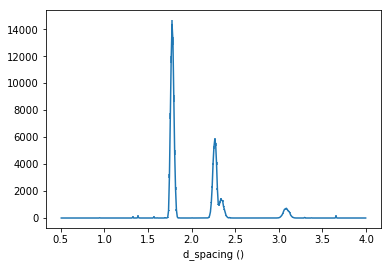

('coll_len,:', 5.921464610451928, 'focal_distance,:', 36.03050079882037, 'collimator_performance: ', 0.08506360991195921)
('coll height at detector side: ', 19.742598091734394)
('coll width at detector side: ', 19.742598091734394)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82ee788> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


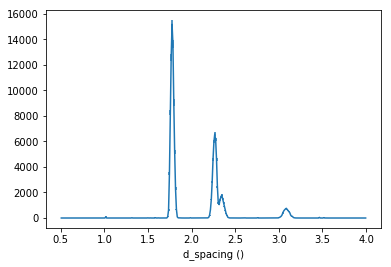

('coll_len,:', 3.1641015134612056, 'focal_distance,:', 20.527016196620067, 'collimator_performance: ', 0.08120660386662736)
('coll height at detector side: ', 25.70161965439726)
('coll width at detector side: ', 25.70161965439726)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82e7ba8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


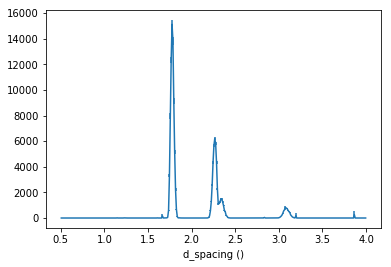

('coll_len,:', 6.1582623227640605, 'focal_distance,:', 24.68368126251265, 'collimator_performance: ', 0.08924930009424623)
('coll height at detector side: ', 22.25104170780611)
('coll width at detector side: ', 22.25104170780611)
('vertical number of channels: ', 3.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d09aa0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


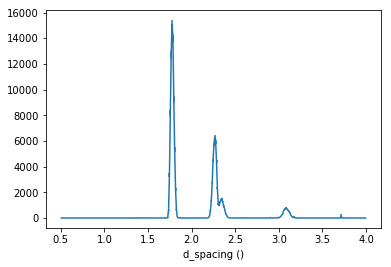

('coll_len,:', 6.596152379783098, 'focal_distance,:', 20.105097669584232, 'collimator_performance: ', 0.086348500632113)
('coll height at detector side: ', 19.021923219568478)
('coll width at detector side: ', 19.021923219568478)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd829aba8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


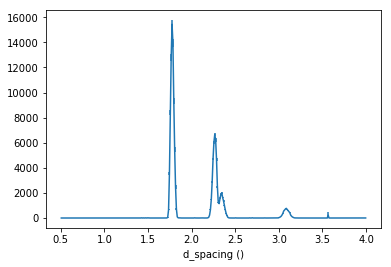

('coll_len,:', 2.3791760476032695, 'focal_distance,:', 20.4471318158789, 'collimator_performance: ', 0.07758092614500878)
('coll height at detector side: ', 23.157178978164275)
('coll width at detector side: ', 23.157178978164275)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc862f4c8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


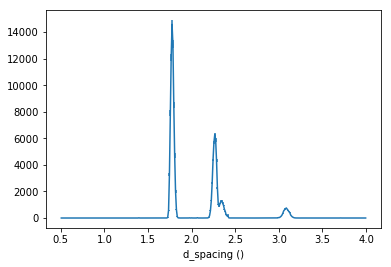

('coll_len,:', 5.80124507699616, 'focal_distance,:', 21.987369696800968, 'collimator_performance: ', 0.08516871882988448)
('coll height at detector side: ', 39.85240559594917)
('coll width at detector side: ', 39.85240559594917)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83f2890> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


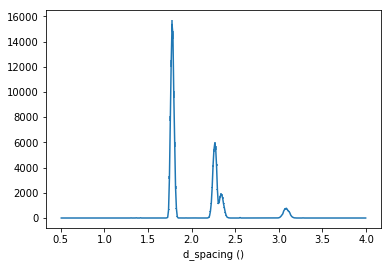

('coll_len,:', 3.749729850073691, 'focal_distance,:', 44.073156865065314, 'collimator_performance: ', 0.08197726488602287)
('coll height at detector side: ', 39.93269882358625)
('coll width at detector side: ', 39.93269882358625)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8240db8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


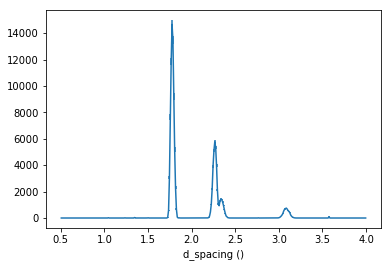

('coll_len,:', 7.78923940160723, 'focal_distance,:', 40.12999918669627, 'collimator_performance: ', 0.08695932887674732)
('coll height at detector side: ', 31.103804235142146)
('coll width at detector side: ', 31.103804235142146)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd803d470> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


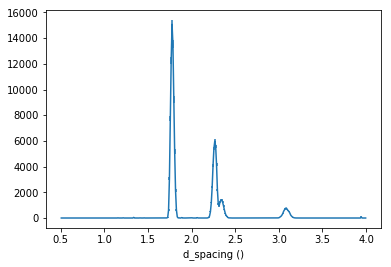

('coll_len,:', 7.190585538134991, 'focal_distance,:', 30.13397954403558, 'collimator_performance: ', 0.08719701236735249)
('coll height at detector side: ', 31.344117045154412)
('coll width at detector side: ', 31.344117045154412)
('vertical number of channels: ', 6.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc878d3c0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


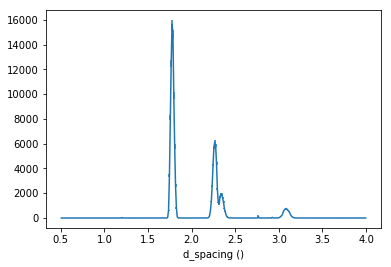

('coll_len,:', 3.1641015134612056, 'focal_distance,:', 34.44883894072409, 'collimator_performance: ', 0.08078368002826897)
('coll height at detector side: ', 25.87860157729974)
('coll width at detector side: ', 25.87860157729974)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8745c00> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


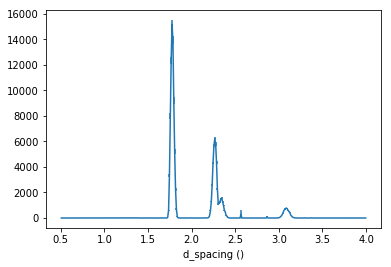

('coll_len,:', 6.177200928336772, 'focal_distance,:', 24.877120964422918, 'collimator_performance: ', 0.08581371298948559)
('coll height at detector side: ', 43.913943712529345)
('coll width at detector side: ', 43.913943712529345)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8533ec0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


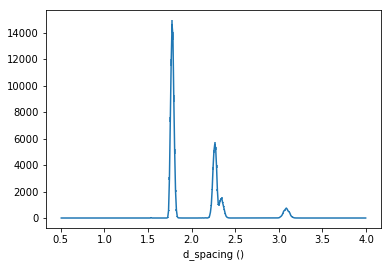

('coll_len,:', 6.8855730223667555, 'focal_distance,:', 45.811159432668454, 'collimator_performance: ', 0.08422238818952256)
('coll height at detector side: ', 20.798851811956567)
('coll width at detector side: ', 20.798851811956567)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84e2158> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


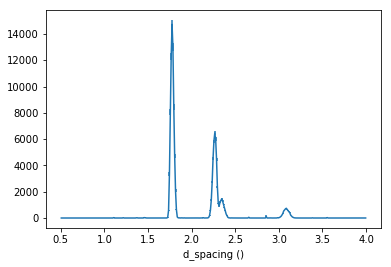

('coll_len,:', 4.511490358468979, 'focal_distance,:', 20.4471318158789, 'collimator_performance: ', 0.08188442571711974)
('coll height at detector side: ', 43.24984882738668)
('coll width at detector side: ', 43.24984882738668)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd84de578> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


(768, 768)


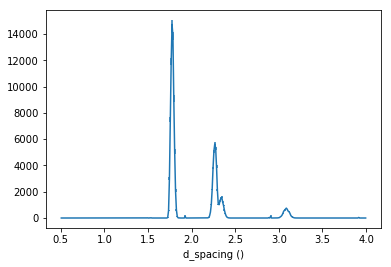

('coll_len,:', 6.164976726026162, 'focal_distance,:', 45.734841866837854, 'collimator_performance: ', 0.08529550212785485)
('coll height at detector side: ', 43.07924897730274)
('coll width at detector side: ', 43.07924897730274)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd82812b8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


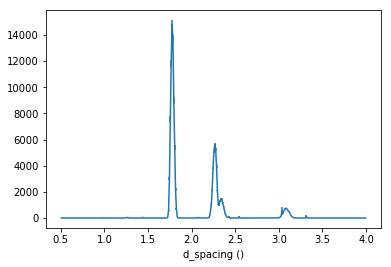

('coll_len,:', 7.621941907697972, 'focal_distance,:', 44.073156865065314, 'collimator_performance: ', 0.09297812881226465)
('coll height at detector side: ', 38.45011024186714)
('coll width at detector side: ', 38.45011024186714)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8281628> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


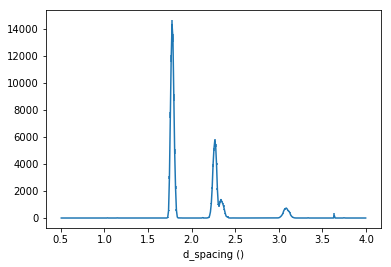

('coll_len,:', 7.67052541988422, 'focal_distance,:', 38.469606870356344, 'collimator_performance: ', 0.08724762039409131)
('coll height at detector side: ', 35.01933664429518)
('coll width at detector side: ', 35.01933664429518)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd842edb8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


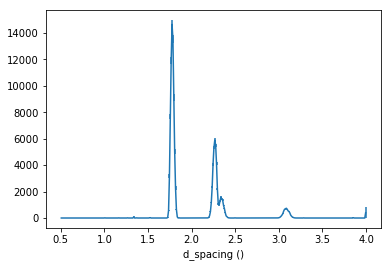

('coll_len,:', 5.251472386669517, 'focal_distance,:', 36.77173158648469, 'collimator_performance: ', 0.0837946580665702)
('coll height at detector side: ', 22.512500340640234)
('coll width at detector side: ', 22.512500340640234)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d1dd08> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


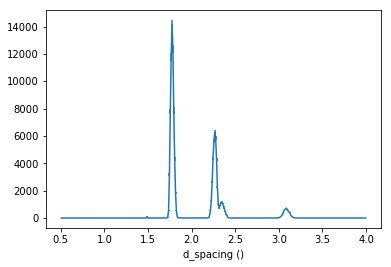

('coll_len,:', 6.4879842121482145, 'focal_distance,:', 20.527016196620067, 'collimator_performance: ', 0.08443233455104862)
('coll height at detector side: ', 22.405658083173623)
('coll width at detector side: ', 22.405658083173623)
('vertical number of channels: ', 4.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83b2788> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


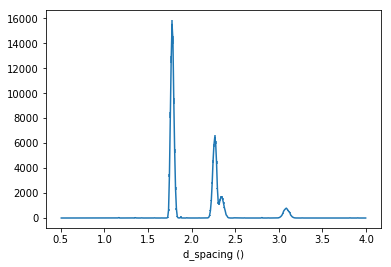

('coll_len,:', 3.83184748541363, 'focal_distance,:', 23.054942214394718, 'collimator_performance: ', 0.08312559008082943)
('coll height at detector side: ', 42.84825176396866)
('coll width at detector side: ', 42.84825176396866)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc85c79f0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


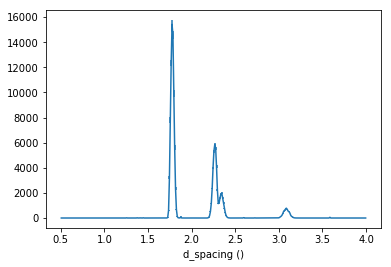

('coll_len,:', 3.75282367589934, 'focal_distance,:', 47.66507844086305, 'collimator_performance: ', 0.0813602096772597)
('coll height at detector side: ', 30.270520962654107)
('coll width at detector side: ', 30.270520962654107)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc823fba8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


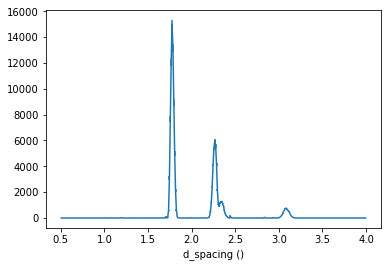

('coll_len,:', 7.2924170903376995, 'focal_distance,:', 29.032208064847225, 'collimator_performance: ', 0.08750689346338152)
('coll height at detector side: ', 43.669381779018)
('coll width at detector side: ', 43.669381779018)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82ebf18> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


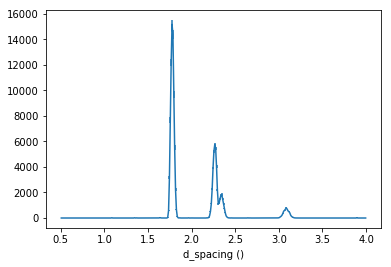

('coll_len,:', 4.889011794163939, 'focal_distance,:', 47.514246340657664, 'collimator_performance: ', 0.08195858509556164)
('coll height at detector side: ', 35.4149051359839)
('coll width at detector side: ', 35.4149051359839)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83f3730> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


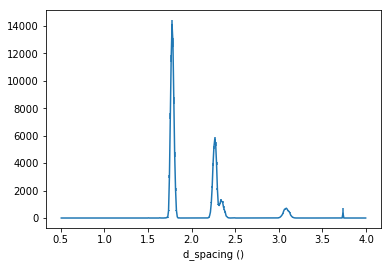

('coll_len,:', 6.8135232227540286, 'focal_distance,:', 35.68436294042665, 'collimator_performance: ', 0.08586314496943977)
('coll height at detector side: ', 42.651551402881815)
('coll width at detector side: ', 42.651551402881815)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87e5578> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


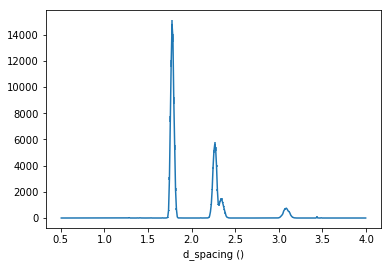

('coll_len,:', 7.379196074709569, 'focal_distance,:', 43.802665608748605, 'collimator_performance: ', 0.08754073502838632)
('coll height at detector side: ', 33.78777098672767)
('coll width at detector side: ', 33.78777098672767)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87a0d08> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


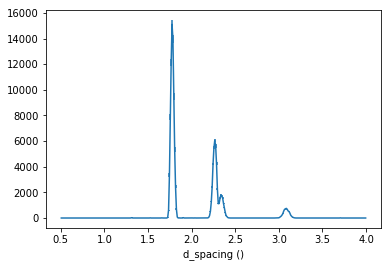

('coll_len,:', 3.6290477411344577, 'focal_distance,:', 36.91627744293875, 'collimator_performance: ', 0.08171723765140686)
('coll height at detector side: ', 37.20669697680835)
('coll width at detector side: ', 37.20669697680835)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82ee890> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


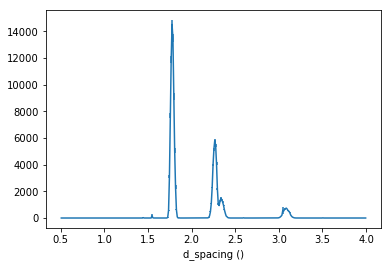

('coll_len,:', 6.4879842121482145, 'focal_distance,:', 38.160052160021806, 'collimator_performance: ', 0.08895268818308125)
('coll height at detector side: ', 42.70134814717276)
('coll width at detector side: ', 42.70134814717276)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8788cb0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


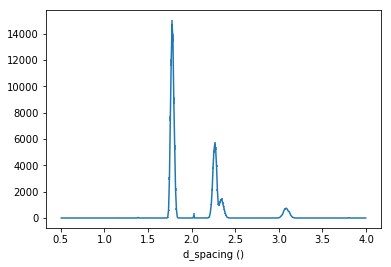

('coll_len,:', 7.627598931691579, 'focal_distance,:', 43.614018844915726, 'collimator_performance: ', 0.0861479285122199)
('coll height at detector side: ', 28.516480191523968)
('coll width at detector side: ', 28.516480191523968)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd842f890> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


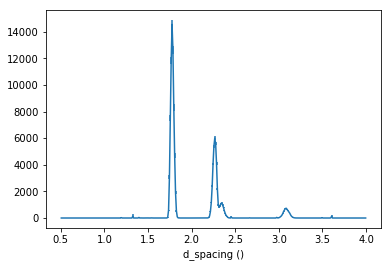

('coll_len,:', 7.379370199829915, 'focal_distance,:', 26.840406029998842, 'collimator_performance: ', 0.08756810712979238)
('coll height at detector side: ', 30.548167302740506)
('coll width at detector side: ', 30.548167302740506)
('vertical number of channels: ', 5.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc828aaf8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


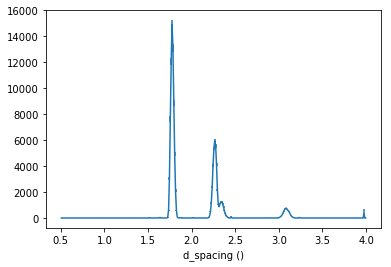

('coll_len,:', 7.625592698441379, 'focal_distance,:', 29.032208064847225, 'collimator_performance: ', 0.08888231894543511)
('coll height at detector side: ', 39.40305420084804)
('coll width at detector side: ', 39.40305420084804)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84ba3c0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


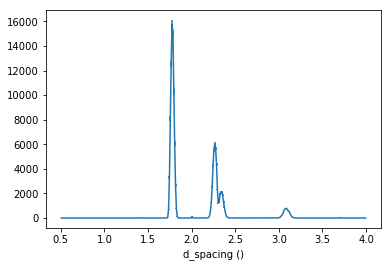

('coll_len,:', 2.2357129203352963, 'focal_distance,:', 45.04795212068235, 'collimator_performance: ', 0.07996253464849981)
('coll height at detector side: ', 33.84208264635157)
('coll width at detector side: ', 33.84208264635157)
('vertical number of channels: ', 6.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84eff70> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


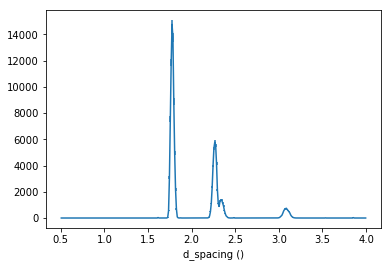

('coll_len,:', 6.882931679674232, 'focal_distance,:', 33.72756749594765, 'collimator_performance: ', 0.08638513330697457)
('coll height at detector side: ', 39.83377050548374)
('coll width at detector side: ', 39.83377050548374)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84c5100> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


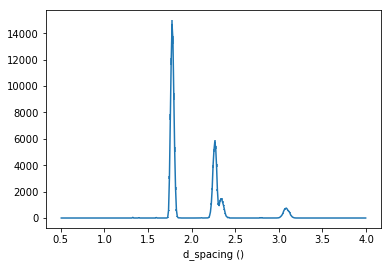

('coll_len,:', 7.67052541988422, 'focal_distance,:', 40.12999918669627, 'collimator_performance: ', 0.08681959001576794)
('coll height at detector side: ', 39.83377051381708)
('coll width at detector side: ', 39.83377051381708)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84a3100> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


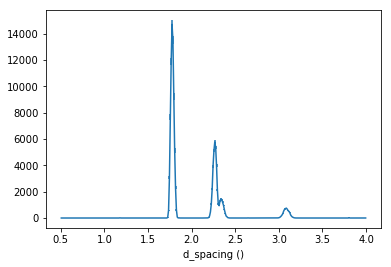

('coll_len,:', 7.67052542988422, 'focal_distance,:', 40.12999918669627, 'collimator_performance: ', 0.08684969296247559)
('coll height at detector side: ', 39.83377051381708)
('coll width at detector side: ', 39.83377051381708)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83b6158> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


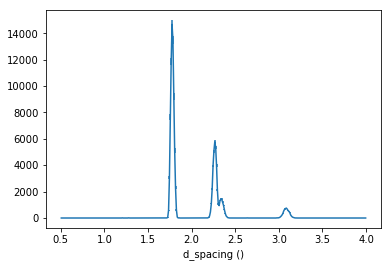

('coll_len,:', 7.67052541988422, 'focal_distance,:', 40.12999919669627, 'collimator_performance: ', 0.08682066526678188)
('coll height at detector side: ', 48.333333333333336)
('coll width at detector side: ', 48.333333333333336)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8701aa0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


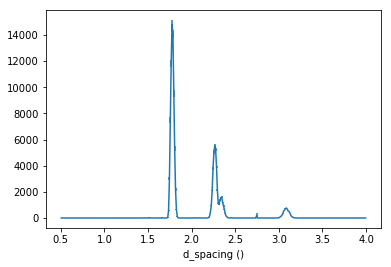

('coll_len,:', 8.0, 'focal_distance,:', 50.0, 'collimator_performance: ', 0.08556565989306508)
('coll height at detector side: ', 48.333333341666666)
('coll width at detector side: ', 48.333333341666666)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd829ae68> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


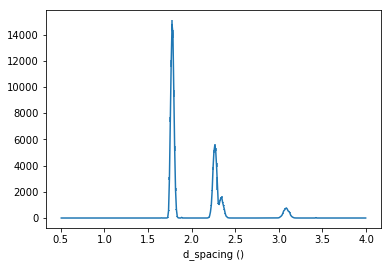

('coll_len,:', 8.00000001, 'focal_distance,:', 50.0, 'collimator_performance: ', 0.08597522357531874)
('coll height at detector side: ', 48.333333341666666)
('coll width at detector side: ', 48.333333341666666)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d22a48> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


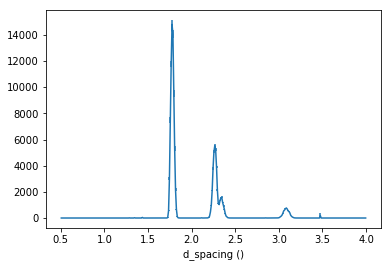

('coll_len,:', 8.0, 'focal_distance,:', 50.00000001, 'collimator_performance: ', 0.08830637372423185)
('coll height at detector side: ', 39.83698374981081)
('coll width at detector side: ', 39.83698374981081)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d0f730> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


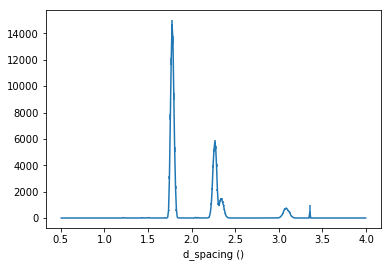

('coll_len,:', 7.670649977152272, 'focal_distance,:', 40.1337305226207, 'collimator_performance: ', 0.09329947487211938)
('coll height at detector side: ', 39.83698375814415)
('coll width at detector side: ', 39.83698375814415)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d22c58> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


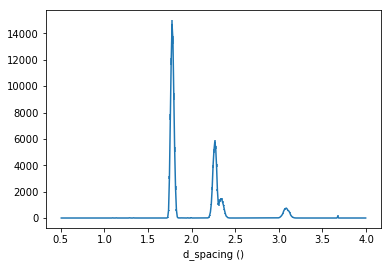

('coll_len,:', 7.670649987152272, 'focal_distance,:', 40.1337305226207, 'collimator_performance: ', 0.08741333198873148)
('coll height at detector side: ', 39.83698375814415)
('coll width at detector side: ', 39.83698375814415)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84f4e68> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


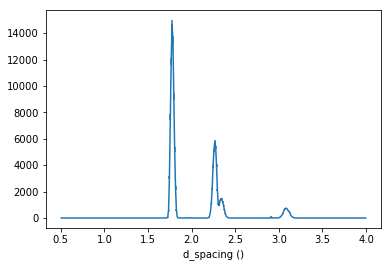

('coll_len,:', 7.670649977152272, 'focal_distance,:', 40.1337305326207, 'collimator_performance: ', 0.08744222202435405)
('coll height at detector side: ', 39.83377169983949)
('coll width at detector side: ', 39.83377169983949)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd84cf7e0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


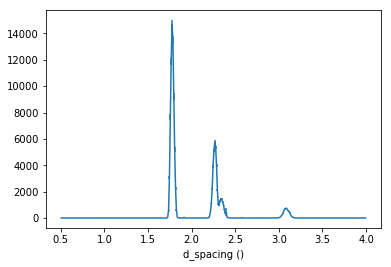

('coll_len,:', 7.670525466181879, 'focal_distance,:', 40.13000057362551, 'collimator_performance: ', 0.08689758468968009)
('coll height at detector side: ', 39.833771708172826)
('coll width at detector side: ', 39.833771708172826)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8309208> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


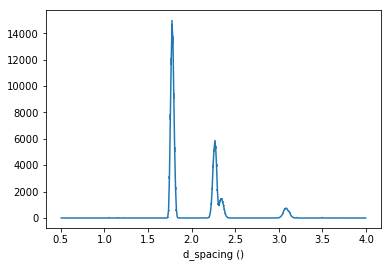

('coll_len,:', 7.670525476181879, 'focal_distance,:', 40.13000057362551, 'collimator_performance: ', 0.08772976808162716)
('coll height at detector side: ', 39.833771708172826)
('coll width at detector side: ', 39.833771708172826)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc85fa260> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


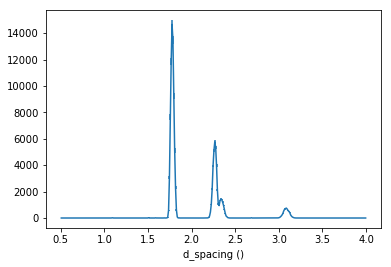

('coll_len,:', 7.670525466181879, 'focal_distance,:', 40.13000058362551, 'collimator_performance: ', 0.08681513557196707)
('coll height at detector side: ', 39.83591831541261)
('coll width at detector side: ', 39.83591831541261)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84d4ec0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


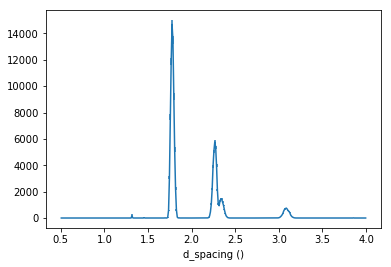

('coll_len,:', 7.670608676963298, 'focal_distance,:', 40.13249330153184, 'collimator_performance: ', 0.08662719612870409)
('coll height at detector side: ', 39.83591832374595)
('coll width at detector side: ', 39.83591832374595)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8099470> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


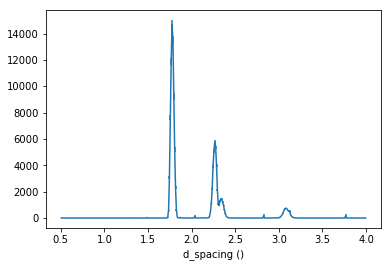

('coll_len,:', 7.670608686963298, 'focal_distance,:', 40.13249330153184, 'collimator_performance: ', 0.08903551067420719)
('coll height at detector side: ', 39.83591832374595)
('coll width at detector side: ', 39.83591832374595)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8639520> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


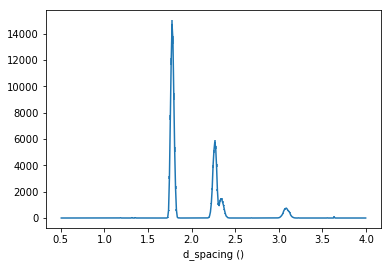

('coll_len,:', 7.670608676963298, 'focal_distance,:', 40.13249331153184, 'collimator_performance: ', 0.0868139257574793)
('coll height at detector side: ', 39.83662007788705)
('coll width at detector side: ', 39.83662007788705)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fef0bbd08> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


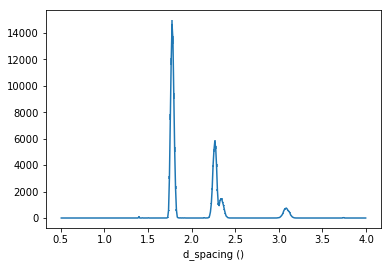

('coll_len,:', 7.670635879879646, 'focal_distance,:', 40.13330821358481, 'collimator_performance: ', 0.0870793833456836)
('coll height at detector side: ', 39.836620086220385)
('coll width at detector side: ', 39.836620086220385)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc862f520> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


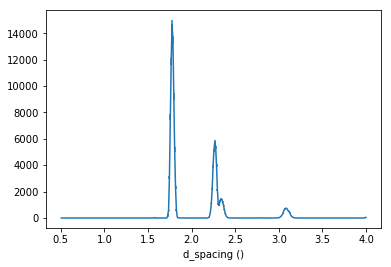

('coll_len,:', 7.670635889879646, 'focal_distance,:', 40.13330821358481, 'collimator_performance: ', 0.08670660193256494)
('coll height at detector side: ', 39.836620086220385)
('coll width at detector side: ', 39.836620086220385)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc862f998> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


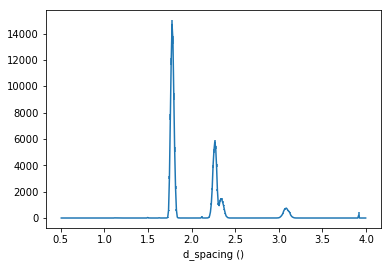

('coll_len,:', 7.670635879879646, 'focal_distance,:', 40.13330822358481, 'collimator_performance: ', 0.08664294631669815)
('coll height at detector side: ', 39.83686729015112)
('coll width at detector side: ', 39.83686729015112)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd83bfc58> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


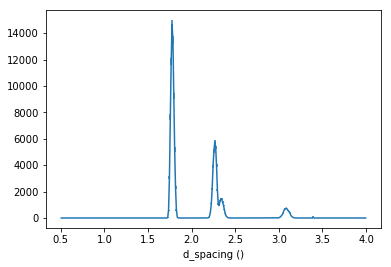

('coll_len,:', 7.670645462743913, 'focal_distance,:', 40.13359528543743, 'collimator_performance: ', 0.08760991631608163)
('coll height at detector side: ', 39.83686729848446)
('coll width at detector side: ', 39.83686729848446)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84f4838> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


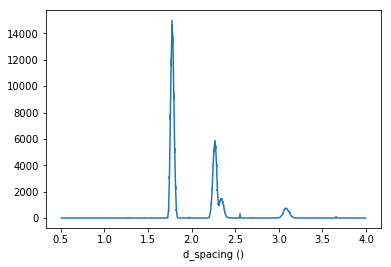

('coll_len,:', 7.670645472743913, 'focal_distance,:', 40.13359528543743, 'collimator_performance: ', 0.08769611617988098)
('coll height at detector side: ', 39.83686729848446)
('coll width at detector side: ', 39.83686729848446)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8063520> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


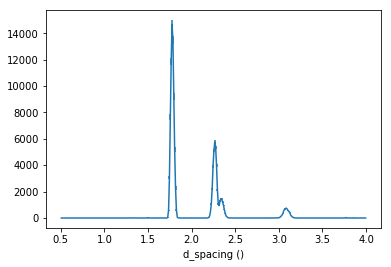

('coll_len,:', 7.670645462743913, 'focal_distance,:', 40.13359529543743, 'collimator_performance: ', 0.08677836351087369)
('coll height at detector side: ', 39.83698374981081)
('coll width at detector side: ', 39.83698374981081)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8422d60> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


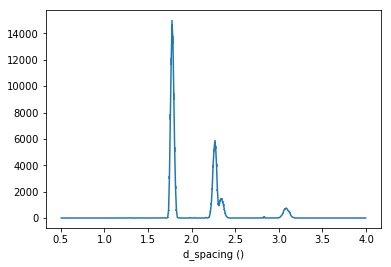

('coll_len,:', 7.670649977152272, 'focal_distance,:', 40.1337305226207, 'collimator_performance: ', 0.08722711218121863)
('coll height at detector side: ', 39.83698375814415)
('coll width at detector side: ', 39.83698375814415)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83eb578> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


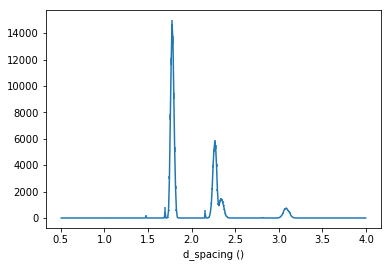

('coll_len,:', 7.670649987152272, 'focal_distance,:', 40.1337305226207, 'collimator_performance: ', 0.08657585994855199)
('coll height at detector side: ', 39.83698375814415)
('coll width at detector side: ', 39.83698375814415)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc85f85d0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


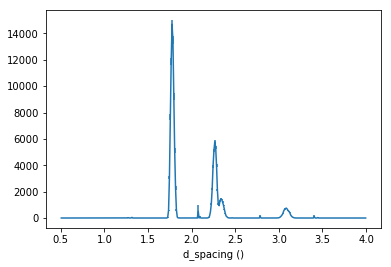

('coll_len,:', 7.670649977152272, 'focal_distance,:', 40.1337305326207, 'collimator_performance: ', 0.08810071404001218)
('coll height at detector side: ', 43.333333333333336)
('coll width at detector side: ', 43.333333333333336)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84b42b8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


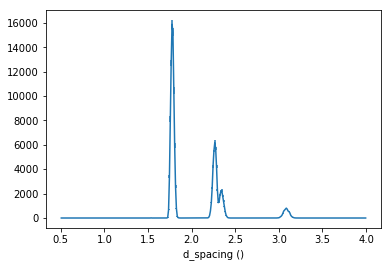

('coll_len,:', 2.0, 'focal_distance,:', 50.0, 'collimator_performance: ', 0.07851111914032691)
('coll height at detector side: ', 43.333333341666666)
('coll width at detector side: ', 43.333333341666666)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd822b4c8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


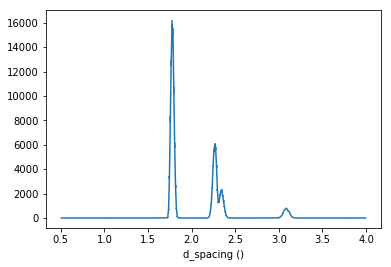

('coll_len,:', 2.00000001, 'focal_distance,:', 50.0, 'collimator_performance: ', 0.0787646367033643)
('coll height at detector side: ', 43.333333341666666)
('coll width at detector side: ', 43.333333341666666)
('vertical number of channels: ', 9.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f4003821fc8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


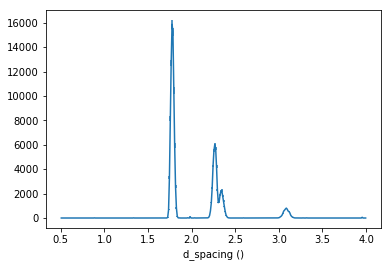

('coll_len,:', 2.0, 'focal_distance,:', 50.00000001, 'collimator_performance: ', 0.07995914561739365)
('coll height at detector side: ', 40.50448963434124)
('coll width at detector side: ', 40.50448963434124)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd84a3d08> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


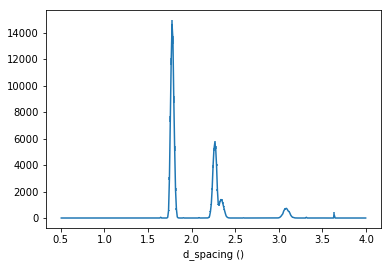

('coll_len,:', 6.588037344050541, 'focal_distance,:', 42.01735021715894, 'collimator_performance: ', 0.08646697948527655)
('coll height at detector side: ', 40.50448964267457)
('coll width at detector side: ', 40.50448964267457)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd82f0890> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


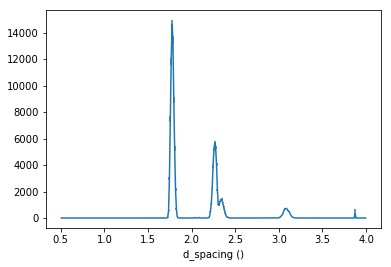

('coll_len,:', 6.588037354050541, 'focal_distance,:', 42.01735021715894, 'collimator_performance: ', 0.08550574750285718)
('coll height at detector side: ', 40.50448964267457)
('coll width at detector side: ', 40.50448964267457)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd83bf260> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


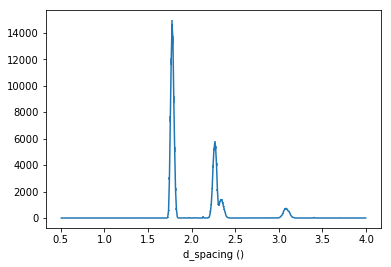

('coll_len,:', 6.588037344050541, 'focal_distance,:', 42.01735022715894, 'collimator_performance: ', 0.08637147049211029)
('coll height at detector side: ', 40.021701969874535)
('coll width at detector side: ', 40.021701969874535)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87743c0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


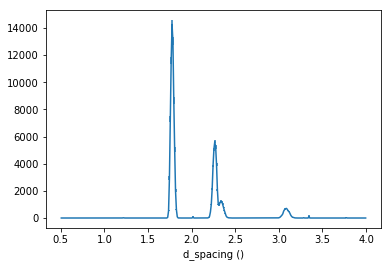

('coll_len,:', 7.371059691523953, 'focal_distance,:', 40.65498267232549, 'collimator_performance: ', 0.08786515533921851)
('coll height at detector side: ', 40.02170197820787)
('coll width at detector side: ', 40.02170197820787)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc86e8158> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


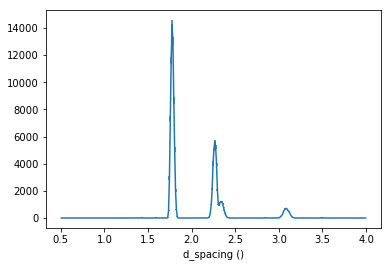

('coll_len,:', 7.3710597015239525, 'focal_distance,:', 40.65498267232549, 'collimator_performance: ', 0.0857940604452858)
('coll height at detector side: ', 40.02170197820787)
('coll width at detector side: ', 40.02170197820787)
('vertical number of channels: ', 8.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc824d050> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


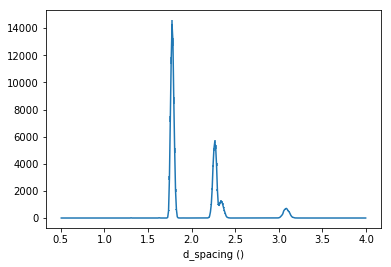

('coll_len,:', 7.371059691523953, 'focal_distance,:', 40.65498268232549, 'collimator_performance: ', 0.08593123628159982)
('coll height at detector side: ', 39.9182421379203)
('coll width at detector side: ', 39.9182421379203)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc85216d8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


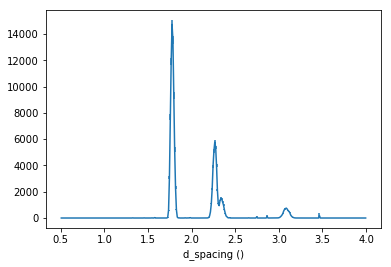

('coll_len,:', 7.538858843094037, 'focal_distance,:', 40.36303172241032, 'collimator_performance: ', 0.0896499883080283)
('coll height at detector side: ', 39.91824214625363)
('coll width at detector side: ', 39.91824214625363)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd84cc470> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


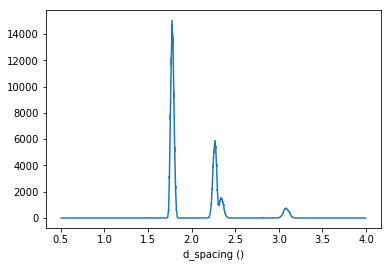

('coll_len,:', 7.538858853094037, 'focal_distance,:', 40.36303172241032, 'collimator_performance: ', 0.08644341153178377)
('coll height at detector side: ', 39.91824214625363)
('coll width at detector side: ', 39.91824214625363)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd80b73c0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


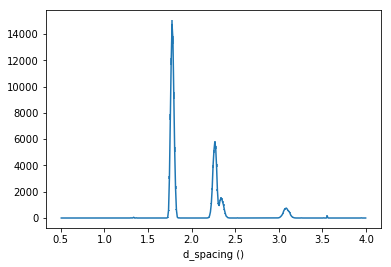

('coll_len,:', 7.538858843094037, 'focal_distance,:', 40.36303173241032, 'collimator_performance: ', 0.08661499979789264)
('coll height at detector side: ', 39.876915993841024)
('coll width at detector side: ', 39.876915993841024)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd846fec0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


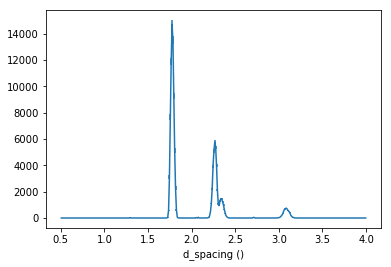

('coll_len,:', 7.605884777538169, 'focal_distance,:', 40.24641441507105, 'collimator_performance: ', 0.08630350591438128)
('coll height at detector side: ', 39.87691600217435)
('coll width at detector side: ', 39.87691600217435)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd842fa48> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


(768, 768)


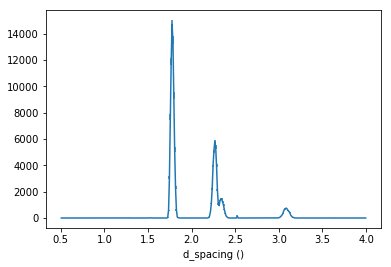

('coll_len,:', 7.6058847875381685, 'focal_distance,:', 40.24641441507105, 'collimator_performance: ', 0.08658768658134379)
('coll height at detector side: ', 39.87691600217435)
('coll width at detector side: ', 39.87691600217435)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8774a48> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


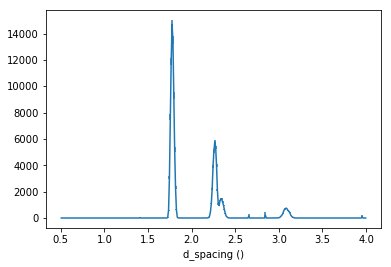

('coll_len,:', 7.605884777538169, 'focal_distance,:', 40.24641442507105, 'collimator_performance: ', 0.0869515546938281)
('coll height at detector side: ', 39.847952331799306)
('coll width at detector side: ', 39.847952331799306)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d09100> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


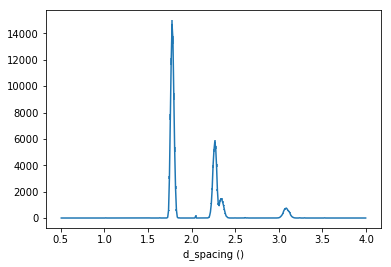

('coll_len,:', 7.652860283153829, 'focal_distance,:', 40.16468251500534, 'collimator_performance: ', 0.08691244567347921)
('coll height at detector side: ', 39.84795234013264)
('coll width at detector side: ', 39.84795234013264)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8788998> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


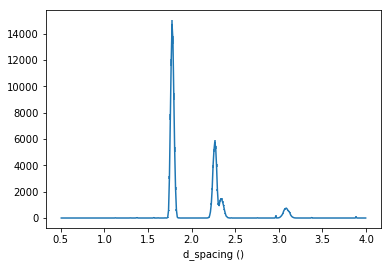

('coll_len,:', 7.652860293153829, 'focal_distance,:', 40.16468251500534, 'collimator_performance: ', 0.08716158955255757)
('coll height at detector side: ', 39.84795234013264)
('coll width at detector side: ', 39.84795234013264)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc822c050> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


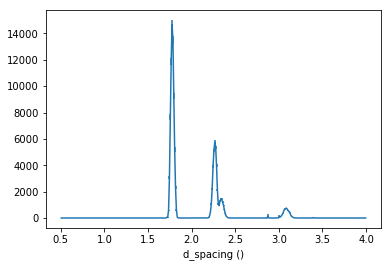

('coll_len,:', 7.652860283153829, 'focal_distance,:', 40.16468252500534, 'collimator_performance: ', 0.08846622552719603)
('coll height at detector side: ', 39.839194738208064)
('coll width at detector side: ', 39.839194738208064)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82052b8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


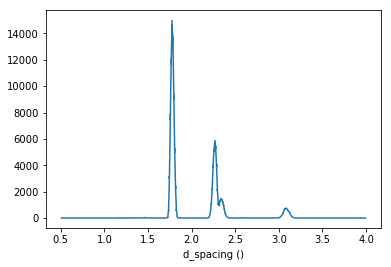

('coll_len,:', 7.667064025288804, 'focal_distance,:', 40.13996966056087, 'collimator_performance: ', 0.0867653990226545)
('coll height at detector side: ', 39.839194746541395)
('coll width at detector side: ', 39.839194746541395)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc81d90a8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


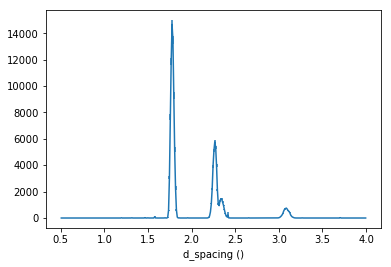

('coll_len,:', 7.667064035288804, 'focal_distance,:', 40.13996966056087, 'collimator_performance: ', 0.08671150706328085)
('coll height at detector side: ', 39.839194746541395)
('coll width at detector side: ', 39.839194746541395)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8797208> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


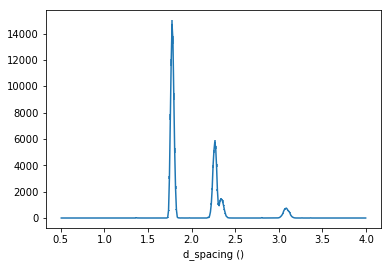

('coll_len,:', 7.667064025288804, 'focal_distance,:', 40.13996967056087, 'collimator_performance: ', 0.08696184894154829)
('coll height at detector side: ', 39.83765604431213)
('coll width at detector side: ', 39.83765604431213)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd84d48e8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


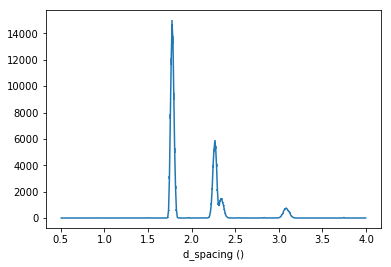

('coll_len,:', 7.669559597970369, 'focal_distance,:', 40.13562765520419, 'collimator_performance: ', 0.08763772284230273)
('coll height at detector side: ', 39.83765605264547)
('coll width at detector side: ', 39.83765605264547)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84fd1b0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


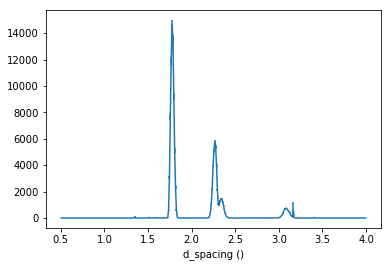

('coll_len,:', 7.669559607970369, 'focal_distance,:', 40.13562765520419, 'collimator_performance: ', 0.09528406972358226)
('coll height at detector side: ', 39.83765605264547)
('coll width at detector side: ', 39.83765605264547)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd80a7260> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


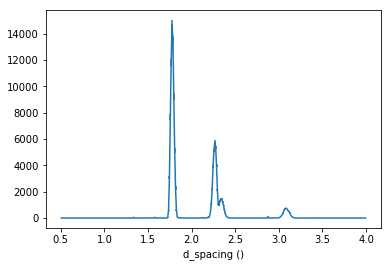

('coll_len,:', 7.669559597970369, 'focal_distance,:', 40.13562766520419, 'collimator_performance: ', 0.08683156704049277)
('coll height at detector side: ', 39.83736047147738)
('coll width at detector side: ', 39.83736047147738)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8398998> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


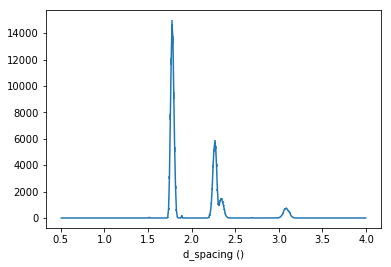

('coll_len,:', 7.670038980837719, 'focal_distance,:', 40.13479358493514, 'collimator_performance: ', 0.08834844629665928)
('coll height at detector side: ', 39.83736047981071)
('coll width at detector side: ', 39.83736047981071)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f400381c520> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


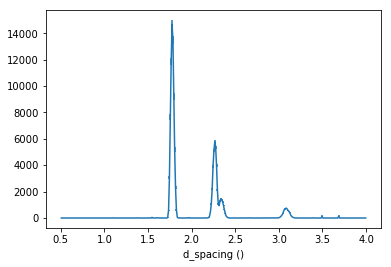

('coll_len,:', 7.670038990837719, 'focal_distance,:', 40.13479358493514, 'collimator_performance: ', 0.08907795864931818)
('coll height at detector side: ', 39.83736047981071)
('coll width at detector side: ', 39.83736047981071)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd829ac00> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


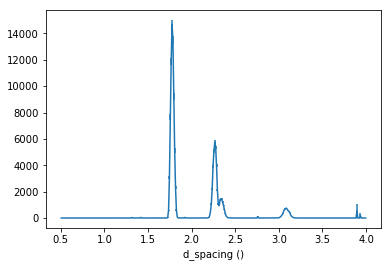

('coll_len,:', 7.670038980837719, 'focal_distance,:', 40.13479359493514, 'collimator_performance: ', 0.08764789657241949)
('coll height at detector side: ', 39.837165950002415)
('coll width at detector side: ', 39.837165950002415)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8713f18> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


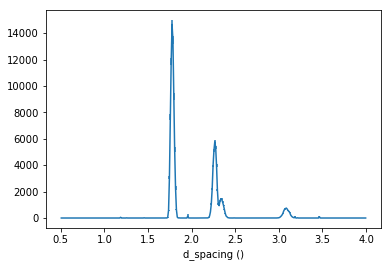

('coll_len,:', 7.670354470799803, 'focal_distance,:', 40.1342446692031, 'collimator_performance: ', 0.0913893911940655)
('coll height at detector side: ', 39.83716595833575)
('coll width at detector side: ', 39.83716595833575)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd84cb100> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


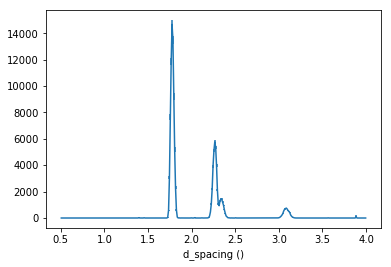

('coll_len,:', 7.670354480799803, 'focal_distance,:', 40.1342446692031, 'collimator_performance: ', 0.08679152745281542)
('coll height at detector side: ', 39.83716595833575)
('coll width at detector side: ', 39.83716595833575)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd838a470> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


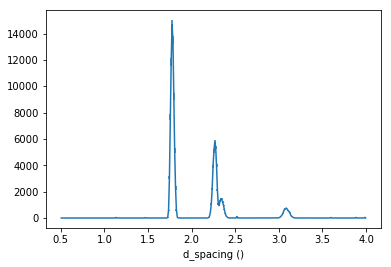

('coll_len,:', 7.670354470799803, 'focal_distance,:', 40.1342446792031, 'collimator_performance: ', 0.08671389744153139)
('coll height at detector side: ', 39.837079674670036)
('coll width at detector side: ', 39.837079674670036)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd83bf3c0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


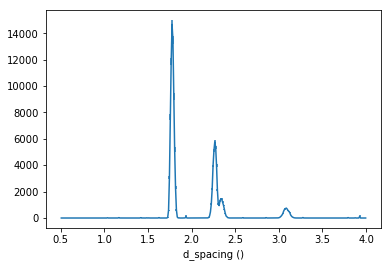

('coll_len,:', 7.67049439880184, 'focal_distance,:', 40.1340012108022, 'collimator_performance: ', 0.08868245460600034)
('coll height at detector side: ', 39.83707968300337)
('coll width at detector side: ', 39.83707968300337)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84b14c8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


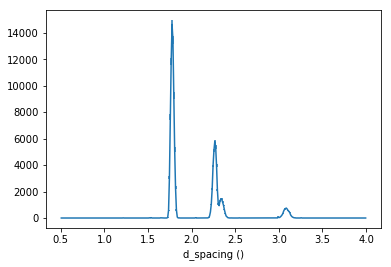

('coll_len,:', 7.67049440880184, 'focal_distance,:', 40.1340012108022, 'collimator_performance: ', 0.08698336946639883)
('coll height at detector side: ', 39.83707968300337)
('coll width at detector side: ', 39.83707968300337)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc86a8520> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


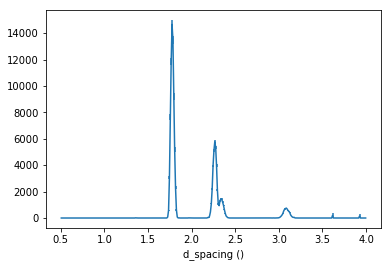

('coll_len,:', 7.67049439880184, 'focal_distance,:', 40.1340012208022, 'collimator_performance: ', 0.08736621708106337)
('coll height at detector side: ', 39.83702014345393)
('coll width at detector side: ', 39.83702014345393)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83d1158> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


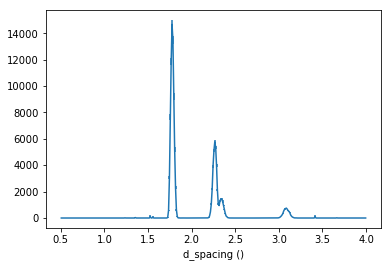

('coll_len,:', 7.67059095112912, 'focal_distance,:', 40.133833221015585, 'collimator_performance: ', 0.0881505993811661)
('coll height at detector side: ', 39.83702015178726)
('coll width at detector side: ', 39.83702015178726)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8391578> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


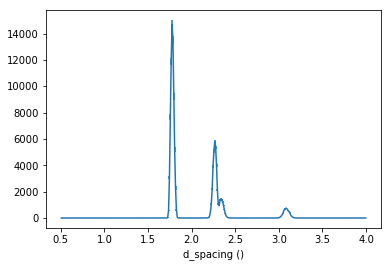

('coll_len,:', 7.67059096112912, 'focal_distance,:', 40.133833221015585, 'collimator_performance: ', 0.08672330596219982)
('coll height at detector side: ', 39.83702015178726)
('coll width at detector side: ', 39.83702015178726)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8774ec0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


(768, 768)


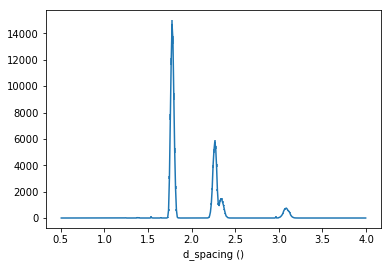

('coll_len,:', 7.67059095112912, 'focal_distance,:', 40.133833231015586, 'collimator_performance: ', 0.08694209233284068)
('coll height at detector side: ', 39.836997846662705)
('coll width at detector side: ', 39.836997846662705)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d151b0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


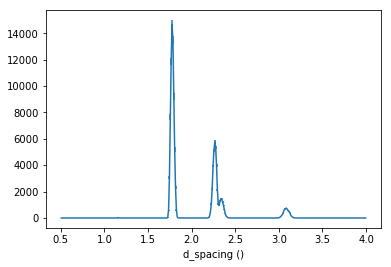

('coll_len,:', 7.670627113788369, 'focal_distance,:', 40.13377030220688, 'collimator_performance: ', 0.08669773802901636)
('coll height at detector side: ', 39.83699785499604)
('coll width at detector side: ', 39.83699785499604)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


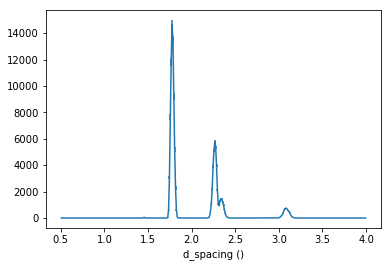

('coll_len,:', 7.6706271237883685, 'focal_distance,:', 40.13377030220688, 'collimator_performance: ', 0.08691800162186293)
('coll height at detector side: ', 39.83699785499604)
('coll width at detector side: ', 39.83699785499604)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f4003821f18> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


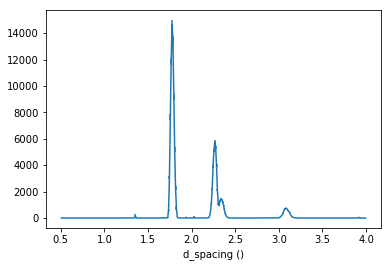

('coll_len,:', 7.670627113788369, 'focal_distance,:', 40.13377031220688, 'collimator_performance: ', 0.08727611712258448)
('coll height at detector side: ', 39.836987676220666)
('coll width at detector side: ', 39.836987676220666)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc861d0a8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


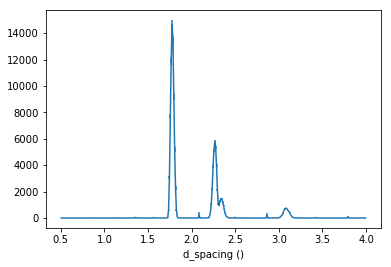

('coll_len,:', 7.670643608997312, 'focal_distance,:', 40.13374160246749, 'collimator_performance: ', 0.08757915451017197)
('coll height at detector side: ', 39.836987684554)
('coll width at detector side: ', 39.836987684554)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83a3100> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


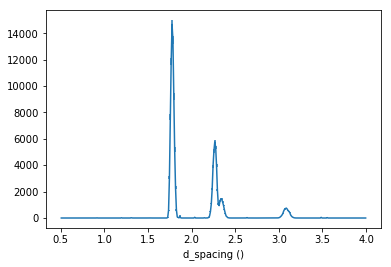

('coll_len,:', 7.670643618997312, 'focal_distance,:', 40.13374160246749, 'collimator_performance: ', 0.08913938605653238)
('coll height at detector side: ', 39.836987684554)
('coll width at detector side: ', 39.836987684554)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8323158> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


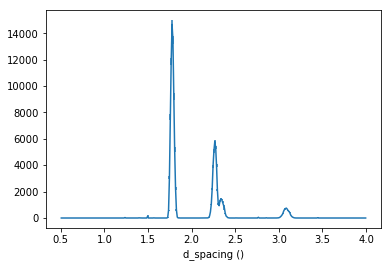

('coll_len,:', 7.670643608997312, 'focal_distance,:', 40.13374161246749, 'collimator_performance: ', 0.08684969034001445)
('coll height at detector side: ', 39.836985773394204)
('coll width at detector side: ', 39.836985773394204)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8476aa0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


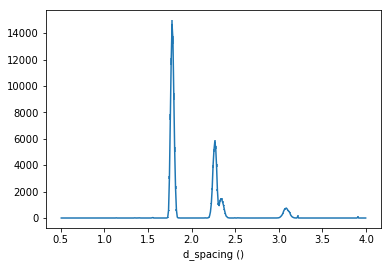

('coll_len,:', 7.670646695148335, 'focal_distance,:', 40.133736232924704, 'collimator_performance: ', 0.08814736695081374)
('coll height at detector side: ', 39.836985781727535)
('coll width at detector side: ', 39.836985781727535)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83e91b0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


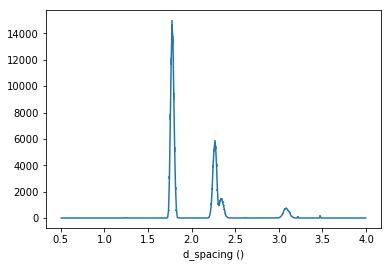

('coll_len,:', 7.670646705148335, 'focal_distance,:', 40.133736232924704, 'collimator_performance: ', 0.08938196365555219)
('coll height at detector side: ', 39.836985781727535)
('coll width at detector side: ', 39.836985781727535)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82952b8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


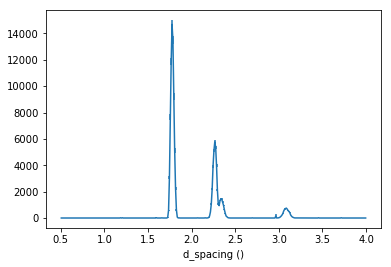

('coll_len,:', 7.670646695148335, 'focal_distance,:', 40.133736242924705, 'collimator_performance: ', 0.08700610200888491)
('coll height at detector side: ', 39.83698457131503)
('coll width at detector side: ', 39.83698457131503)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83d1e68> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


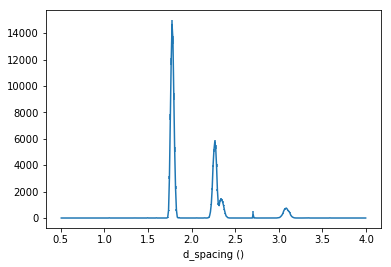

('coll_len,:', 7.670648644773248, 'focal_distance,:', 40.13373284080478, 'collimator_performance: ', 0.08690057036247728)
('coll height at detector side: ', 39.83698457964836)
('coll width at detector side: ', 39.83698457964836)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd842e628> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


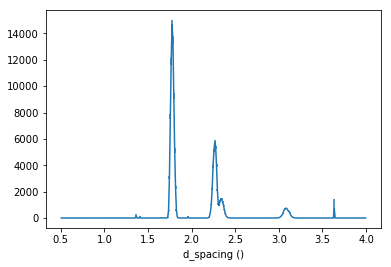

('coll_len,:', 7.670648654773248, 'focal_distance,:', 40.13373284080478, 'collimator_performance: ', 0.08780514817019812)
('coll height at detector side: ', 39.83698457964836)
('coll width at detector side: ', 39.83698457964836)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9cf0368> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


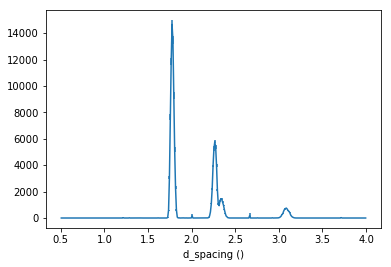

('coll_len,:', 7.670648644773248, 'focal_distance,:', 40.13373285080478, 'collimator_performance: ', 0.08710958577640796)
('coll height at detector side: ', 39.83698540655418)
('coll width at detector side: ', 39.83698540655418)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9cf0100> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


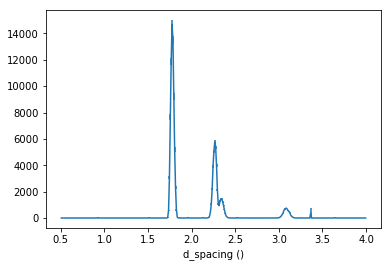

('coll_len,:', 7.6706472901178415, 'focal_distance,:', 40.13373519774717, 'collimator_performance: ', 0.09278141864426591)
('coll height at detector side: ', 39.836985414887515)
('coll width at detector side: ', 39.836985414887515)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd827be68> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


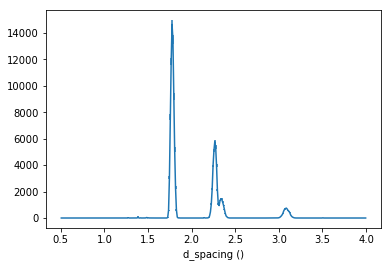

('coll_len,:', 7.6706473001178415, 'focal_distance,:', 40.13373519774717, 'collimator_performance: ', 0.08678499412520514)
('coll height at detector side: ', 39.836985414887515)
('coll width at detector side: ', 39.836985414887515)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd84765d0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


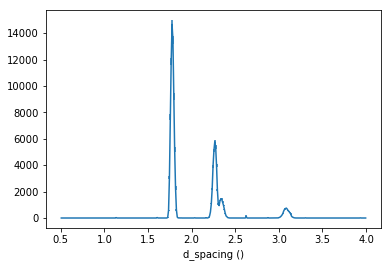

('coll_len,:', 7.6706472901178415, 'focal_distance,:', 40.13373520774717, 'collimator_performance: ', 0.08827893067105774)
('coll height at detector side: ', 39.836984685470014)
('coll width at detector side: ', 39.836984685470014)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87b90a8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


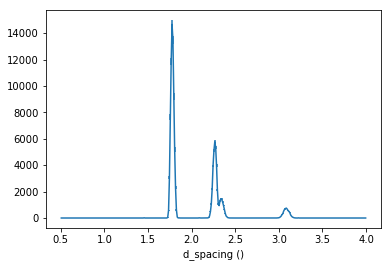

('coll_len,:', 7.6706462488215745, 'focal_distance,:', 40.13373537374244, 'collimator_performance: ', 0.0871878694608651)
('coll height at detector side: ', 39.83698469380335)
('coll width at detector side: ', 39.83698469380335)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8343fc8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


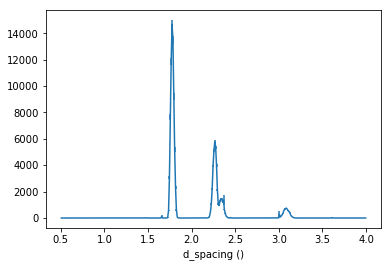

('coll_len,:', 7.6706462588215745, 'focal_distance,:', 40.13373537374244, 'collimator_performance: ', 0.08963516596668021)
('coll height at detector side: ', 39.83698469380335)
('coll width at detector side: ', 39.83698469380335)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc85ee158> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


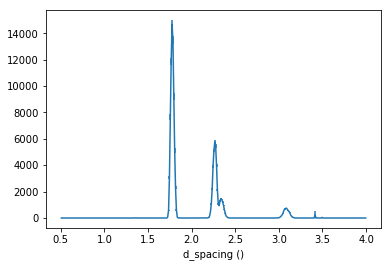

('coll_len,:', 7.6706462488215745, 'focal_distance,:', 40.13373538374244, 'collimator_performance: ', 0.09095045040466662)
('coll height at detector side: ', 39.836985126354676)
('coll width at detector side: ', 39.836985126354676)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd84cb1b0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


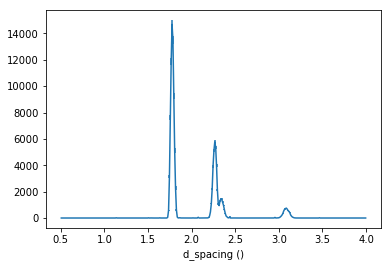

('coll_len,:', 7.670646885490051, 'focal_distance,:', 40.13373526613556, 'collimator_performance: ', 0.08718537044252778)
('coll height at detector side: ', 39.836985134688014)
('coll width at detector side: ', 39.836985134688014)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8033050> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


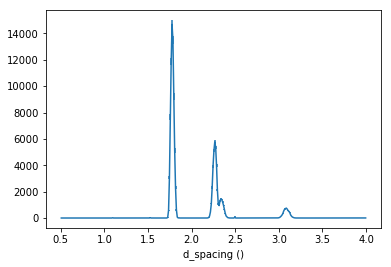

('coll_len,:', 7.670646895490051, 'focal_distance,:', 40.13373526613556, 'collimator_performance: ', 0.08629853513375306)
('coll height at detector side: ', 39.836985134688014)
('coll width at detector side: ', 39.836985134688014)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd83ac050> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


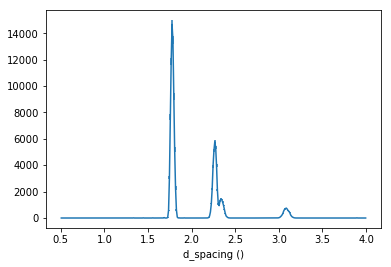

('coll_len,:', 7.670646885490051, 'focal_distance,:', 40.13373527613556, 'collimator_performance: ', 0.0868681642300745)
('coll height at detector side: ', 39.836985324799144)
('coll width at detector side: ', 39.836985324799144)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d0f628> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


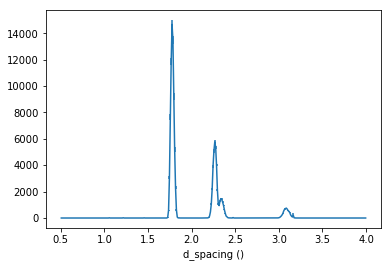

('coll_len,:', 7.670647172057822, 'focal_distance,:', 40.13373521770115, 'collimator_performance: ', 0.08884758308985588)
('coll height at detector side: ', 39.836985333132475)
('coll width at detector side: ', 39.836985333132475)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8390470> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


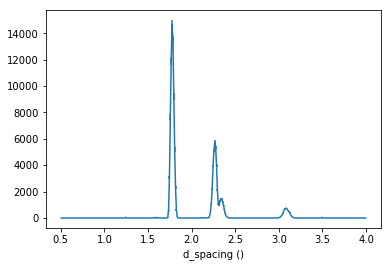

('coll_len,:', 7.670647182057822, 'focal_distance,:', 40.13373521770115, 'collimator_performance: ', 0.08711800942944127)
('coll height at detector side: ', 39.836985333132475)
('coll width at detector side: ', 39.836985333132475)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd8398f70> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


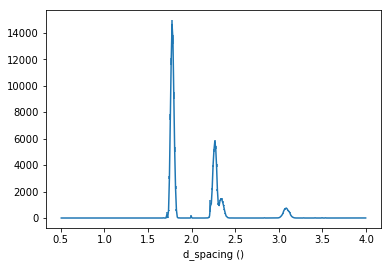

('coll_len,:', 7.670647172057822, 'focal_distance,:', 40.13373522770115, 'collimator_performance: ', 0.08847065972881772)
('coll height at detector side: ', 39.83698538569676)
('coll width at detector side: ', 39.83698538569676)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc836d208> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


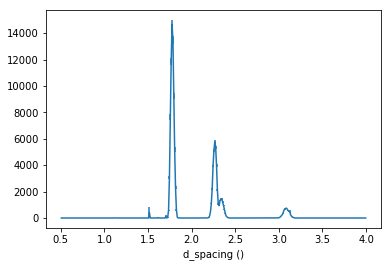

('coll_len,:', 7.670647259998245, 'focal_distance,:', 40.133735202837855, 'collimator_performance: ', 0.08793768265544846)
('coll height at detector side: ', 39.83698539403008)
('coll width at detector side: ', 39.83698539403008)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d14c58> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


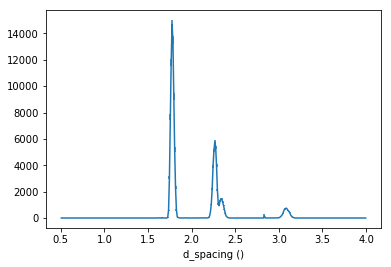

('coll_len,:', 7.670647269998245, 'focal_distance,:', 40.133735202837855, 'collimator_performance: ', 0.08669566623823088)
('coll height at detector side: ', 39.83698539403009)
('coll width at detector side: ', 39.83698539403009)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd82f8578> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


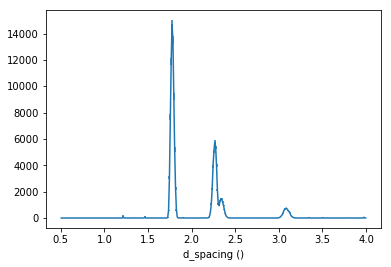

('coll_len,:', 7.670647259998245, 'focal_distance,:', 40.133735212837855, 'collimator_performance: ', 0.08751674226241103)
('coll height at detector side: ', 39.836985402566285)
('coll width at detector side: ', 39.836985402566285)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd82f0470> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


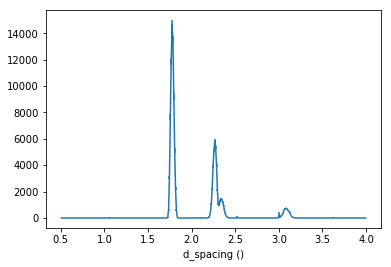

('coll_len,:', 7.67064728435904, 'focal_distance,:', 40.1337351987205, 'collimator_performance: ', 0.08969291600757519)
('coll height at detector side: ', 39.83698541089962)
('coll width at detector side: ', 39.83698541089962)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87035d0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


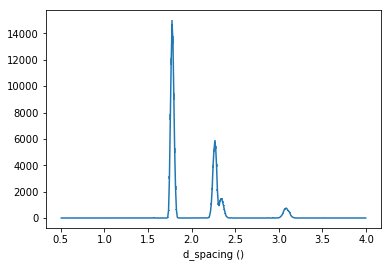

('coll_len,:', 7.67064729435904, 'focal_distance,:', 40.1337351987205, 'collimator_performance: ', 0.08671995631056299)
('coll height at detector side: ', 39.83698541089962)
('coll width at detector side: ', 39.83698541089962)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc82b0628> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


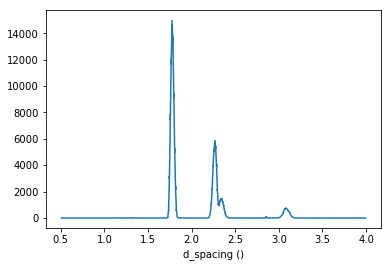

('coll_len,:', 7.67064728435904, 'focal_distance,:', 40.1337352087205, 'collimator_performance: ', 0.08724508101587725)
('coll height at detector side: ', 39.836985406150795)
('coll width at detector side: ', 39.836985406150795)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d1ffc8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


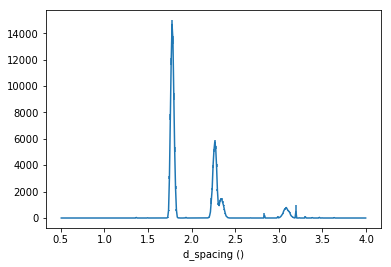

('coll_len,:', 7.670647289535331, 'focal_distance,:', 40.133735197845624, 'collimator_performance: ', 0.09775900271209664)
('coll height at detector side: ', 39.83698541448413)
('coll width at detector side: ', 39.83698541448413)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8670680> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


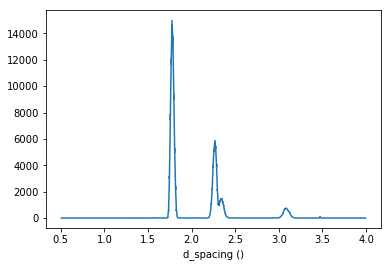

('coll_len,:', 7.6706472995353305, 'focal_distance,:', 40.133735197845624, 'collimator_performance: ', 0.08787325192783406)
('coll height at detector side: ', 39.83698541448413)
('coll width at detector side: ', 39.83698541448413)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc87b96d8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


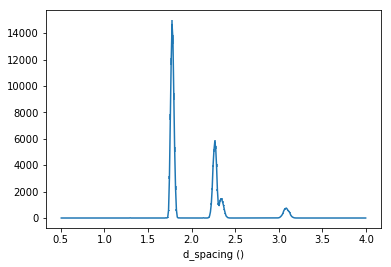

('coll_len,:', 7.670647289535331, 'focal_distance,:', 40.133735207845625, 'collimator_performance: ', 0.08667643570703418)
('coll height at detector side: ', 39.836985405914234)
('coll width at detector side: ', 39.836985405914234)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd9d228e8> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


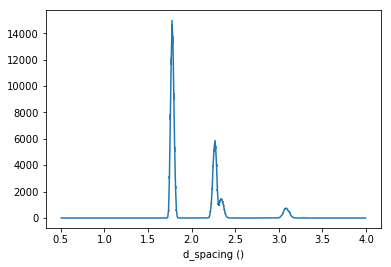

('coll_len,:', 7.670647289193715, 'focal_distance,:', 40.13373519790336, 'collimator_performance: ', 0.08781257893812999)
('coll height at detector side: ', 39.83698541424757)
('coll width at detector side: ', 39.83698541424757)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc861dcb0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


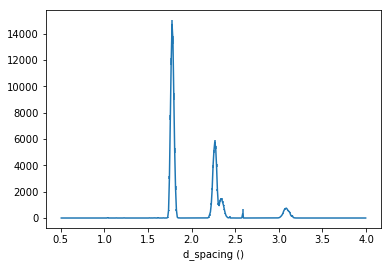

('coll_len,:', 7.670647299193715, 'focal_distance,:', 40.13373519790336, 'collimator_performance: ', 0.08793186030778698)
('coll height at detector side: ', 39.83698541424757)
('coll width at detector side: ', 39.83698541424757)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc8788470> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


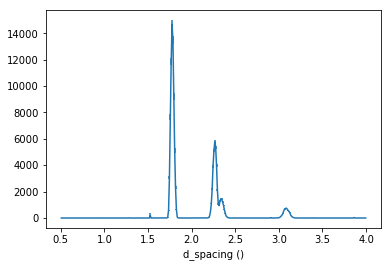

('coll_len,:', 7.670647289193715, 'focal_distance,:', 40.133735207903364, 'collimator_performance: ', 0.08719077578459912)
('coll height at detector side: ', 39.83698540614973)
('coll width at detector side: ', 39.83698540614973)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd83bf100> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


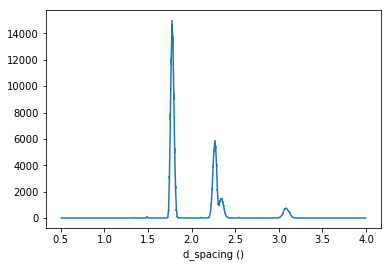

('coll_len,:', 7.6706472895337905, 'focal_distance,:', 40.13373519784589, 'collimator_performance: ', 0.08708419548965116)
('coll height at detector side: ', 39.83698541448307)
('coll width at detector side: ', 39.83698541448307)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc84c8680> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


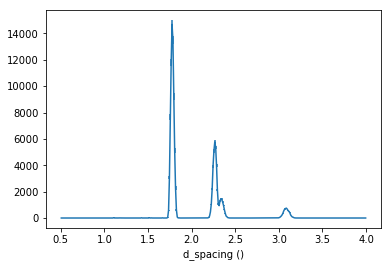

('coll_len,:', 7.67064729953379, 'focal_distance,:', 40.13373519784589, 'collimator_performance: ', 0.08707238691337346)
('coll height at detector side: ', 39.83698541448307)
('coll width at detector side: ', 39.83698541448307)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc86e81b0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


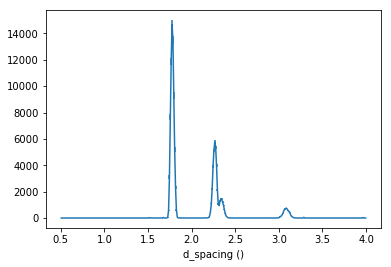

('coll_len,:', 7.6706472895337905, 'focal_distance,:', 40.13373520784589, 'collimator_performance: ', 0.08793508160550621)
('coll height at detector side: ', 39.836985406150795)
('coll width at detector side: ', 39.836985406150795)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fd84d4a48> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


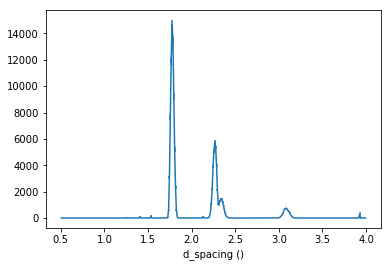

('coll_len,:', 7.670647289535331, 'focal_distance,:', 40.133735197845624, 'collimator_performance: ', 0.08683511836902308)
('coll height at detector side: ', 39.83698541448413)
('coll width at detector side: ', 39.83698541448413)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc829e208> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


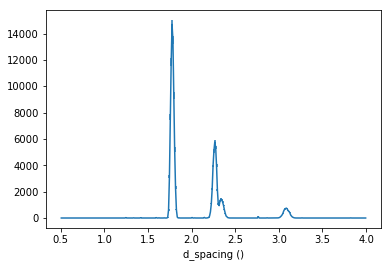

('coll_len,:', 7.6706472995353305, 'focal_distance,:', 40.133735197845624, 'collimator_performance: ', 0.0868857574275611)
('coll height at detector side: ', 39.83698541448413)
('coll width at detector side: ', 39.83698541448413)
('vertical number of channels: ', 7.0)
('detector_angle: ', -50)
(768, 768)


/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/run_script.py:125: UserWarning: Developer: <mccomposite.mccompositebp.CompositeNeutronScatterer object at 0x7f3fc83263c0> does not implement method "create_pps"
  warnings.warn('Developer: %s does not implement method "create_pps"' % comp)


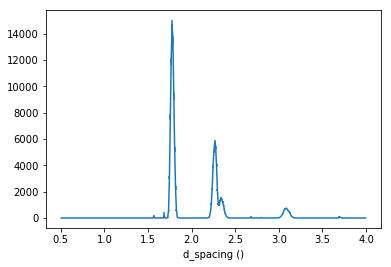

('coll_len,:', 7.670647289535331, 'focal_distance,:', 40.133735207845625, 'collimator_performance: ', 0.08653214306374621)


array([ 7.67052542, 40.12999919])

In [30]:
coll.optimize()

# Creating the geometry of collimator with optimized parameters in xml format so that it can be exported to cad file

In [35]:
from c3dp.instruments.collimator.collimator_geometry_zigzag import create

In [36]:
create(coll_front_end_from_center=40.13, max_coll_len= 7.6, scad_flag=True,
           outputfile=collimator_geo_file)

('vertical number of channels: ', 12.0)


# exporting optimized collimator geometry to cad file for 3D printing

In [37]:
import c3dp.exports.cad as cad
cad.xmlToOpenScad(filename=collimator_geo_file+'.xml')

### can be viewed the 3D geometry with openscad software  with the following command###

In [39]:
!vglrun openscad {collimator_geo_file+'.scad'}

In [40]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://raw.githubusercontent.com/Fahima-Islam/c3dp/master/figures/Screenshot%20from%202019-04-23%2011-51-49.png")

# GAUGE VOLUME CALCULATION ##

In [3]:
from c3dp.gaugevol import gauge_volume as gv

### creating the cylindrical surface of the collimator ###

In [4]:
number_of_channels_vertical=9.
number_of_channels_horizontal = 1.
channel_size=3.

channel_openningHeight_sample=channel_size*number_of_channels_vertical #mm channel opening size
channel_openningWidth_sample=channel_size*number_of_channels_horizontal #mm channel opening size


collimator_inner_radius=16.02 #mm
coll_length=380. #mm
collimator_outer_radius=coll_length+collimator_inner_radius
channel_openningHeight_detector=(collimator_outer_radius*channel_openningHeight_sample)/collimator_inner_radius

channel_angular_size= gv.span2angle(channel_openningWidth_sample, collimator_inner_radius)

offset_height=0.
offset_length=0.
Cs_cylinder = gv.make_cylindrical_surface(collimator_inner_radius, channel_angular_size, channel_openningHeight_sample,length_misalignment_offset=offset_length, height_misalignment_offset=offset_height)
Cd_cylinder = gv.make_cylindrical_surface(collimator_outer_radius, channel_angular_size, channel_openningHeight_detector,length_misalignment_offset=offset_length,height_misalignment_offset=offset_height )

### creating the sample grid ###

In [8]:
sample_height=26. #mm
sample_width=4.16 #mm

arbitrary_height= sample_height+10.
arbitrary_width=sample_width+10.
stepsize=0.1
zS=np.arange(-arbitrary_height/2., arbitrary_height/2., stepsize) #sample_positions_z vertical
yS=np.arange(-arbitrary_width/2., arbitrary_width/2., stepsize) #sample_positions_y
xS=0.

sample_points=np.array(np.meshgrid(xS,yS,zS))
sample_points=sample_points.transpose(1,2,3,0)
sample_points.shape=-1,3
Syz=sample_points[:,[1,2]].T

### creating the spherical coordinate of the collimator ###

In [9]:
theta_phiS = gv.theta_phi(Cs_cylinder, sample_points)
theta_phiD = gv.theta_phi(Cd_cylinder, sample_points)

### calculating gauge volume ###

In [10]:
sample_pos, gauge_volume = gv.gauge_volume(theta_phiS, theta_phiD, Syz)

### displaying gauge volume ###

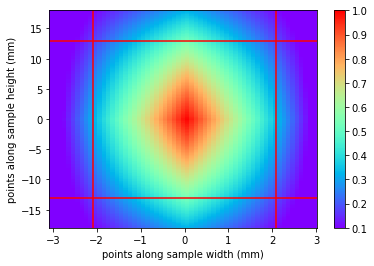

In [12]:
gv.making_plot(sample_pos, gauge_volume, arbitrary_height/2.,-arbitrary_height/2., sample_height, sample_width, min_color=0.1, max_color=1)